In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/awesome/Downloads/Data Analysis/HPD/HPD.csv', parse_dates = ['Occurrence\nDate'])

In [3]:
list(df.columns) 

['Incident',
 'Occurrence\nDate',
 'Occurrence\nHour',
 'NIBRS\nClass',
 'NIBRSDescription',
 'Offense\nCount',
 'Beat',
 'Premise',
 'Block Range',
 'StreetName',
 'Street\nType',
 'Suffix',
 'ZIP Code']

In [4]:
df.columns = df.columns.str.replace('\n',' ')

In [5]:
list(df.columns)

['Incident',
 'Occurrence Date',
 'Occurrence Hour',
 'NIBRS Class',
 'NIBRSDescription',
 'Offense Count',
 'Beat',
 'Premise',
 'Block Range',
 'StreetName',
 'Street Type',
 'Suffix',
 'ZIP Code']

In [6]:
df.shape

(218428, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Incident          218428 non-null  int64         
 1   Occurrence Date   218428 non-null  datetime64[ns]
 2   Occurrence Hour   218428 non-null  int64         
 3   NIBRS Class       218428 non-null  object        
 4   NIBRSDescription  218428 non-null  object        
 5   Offense Count     218428 non-null  int64         
 6   Beat              218307 non-null  object        
 7   Premise           218428 non-null  object        
 8   Block Range       218428 non-null  int64         
 9   StreetName        218428 non-null  object        
 10  Street Type       200763 non-null  object        
 11  Suffix            30456 non-null   object        
 12  ZIP Code          215724 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 21.

In [8]:
df.head()

,Incident,Occurrence Date,Occurrence Hour,NIBRS Class,NIBRSDescription,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
0,5619,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",9622,SAN CARLOS,NaN,NaN,77013
1,17319,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",0,EAST,FWY,NaN,77020
2,18119,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT,NaN,77489
3,19019,2019-01-01,0,520,Weapon law violations,1,NaN,"Residence, Home (Includes Apartment)",1909,MELBOURNE,NaN,NaN,77026-0000
4,20519,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR,NaN,77025


In [9]:
df.tail()

,Incident,Occurrence Date,Occurrence Hour,NIBRS Class,NIBRSDescription,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
218423,172626019,2019-12-31,23,13A,Aggravated Assault,1,14D10,"Residence, Home (Includes Apartment)",3809,SOUTHLAWN,ST,NaN,77021
218424,172629419,2019-12-31,23,13A,Aggravated Assault,1,17E10,"Residence, Home (Includes Apartment)",6600,HILLCROFT,AVE,NaN,77081
218425,172632119,2019-12-31,23,23C,Shoplifting,1,7C10,Convenience Store,2724,QUITMAN,ST,NaN,77026
218426,172634619,2019-12-31,23,13C,Intimidation,1,12D10,"Highway, Road, Street, Alley",9400,GULF,FWY,NaN,77075
218427,172634619,2019-12-31,23,35A,"Drug, narcotic violations",1,12D10,"Highway, Road, Street, Alley",9400,GULF,FWY,NaN,77075


In [10]:
df.rename(columns={'Occurrence Date':'Date','Occurrence Hour':'Hour', 'NIBRSDescription':'Description'}, inplace=True)

In [11]:
df.head()

,Incident,Date,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
0,5619,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",9622,SAN CARLOS,NaN,NaN,77013
1,17319,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",0,EAST,FWY,NaN,77020
2,18119,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT,NaN,77489
3,19019,2019-01-01,0,520,Weapon law violations,1,NaN,"Residence, Home (Includes Apartment)",1909,MELBOURNE,NaN,NaN,77026-0000
4,20519,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR,NaN,77025


In [17]:
def count_per(data):
    Total = df['Description'].value_counts()
    Percentage = df['Description'].value_counts(normalize=True)
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
Theft from motor vehicle,33062,0.151363
Simple assault,27138,0.124242
"Destruction, damage, vandalism",21617,0.098966
All other larceny,18440,0.084421
"Burglary, Breaking and Entering",16879,0.077275
Intimidation,14135,0.064712
Motor vehicle theft,13075,0.059860
Aggravated Assault,12652,0.057923
Shoplifting,10788,0.049389
Robbery,9195,0.042096


In [18]:
def count_per(data):
    Total = df[df['Description']== 'Theft from motor vehicle']['Premise'].value_counts()
    Percentage = df[df['Description']== 'Theft from motor vehicle']['Premise'].value_counts(normalize=True)
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
"Parking Lot, Garage",17675,0.534602
"Residence, Home (Includes Apartment)",5573,0.168562
"Highway, Road, Street, Alley",4537,0.137227
Restaurant,1052,0.031819
"Hotel, Motel, ETC",596,0.018027
"Other, Unknown",584,0.017664
Park/Playground,574,0.017361
"Service, Gas Station",533,0.016121
"Commercial, Office Building",314,0.009497
"Bar, Nightclub",258,0.007804


In [13]:
def count_per(data):
    Total = df['Premise'].value_counts()
    Percentage = df['Premise'].value_counts(normalize=True)
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
"Residence, Home (Includes Apartment)",81140,0.371473
"Parking Lot, Garage",42139,0.192919
"Highway, Road, Street, Alley",27743,0.127012
"Other, Unknown",9988,0.045727
"Department, Discount Store",7118,0.032587
Restaurant,6146,0.028137
"Commercial, Office Building",5678,0.025995
Convenience Store,5372,0.024594
"Service, Gas Station",4816,0.022048
"Hotel, Motel, ETC",4029,0.018445


In [27]:
def count_per(data):
    Total = df[df['Premise'] =='Residence, Home (Includes Apartment)']['Description'].value_counts()
    Percentage = df[df['Premise'] =='Residence, Home (Includes Apartment)']['Description'].value_counts(normalize=True)
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
Simple assault,16760,0.206557
"Burglary, Breaking and Entering",10563,0.130182
"Destruction, damage, vandalism",10009,0.123355
Intimidation,8472,0.104412
All other larceny,7265,0.089537
Aggravated Assault,6856,0.084496
Theft from motor vehicle,5573,0.068684
Motor vehicle theft,2887,0.035580
Robbery,1826,0.022504
Theft of motor vehicle parts or accessory,1594,0.019645


In [38]:
holi_date

['2019-01-01',
 '2019-01-21',
 '2019-02-18',
 '2019-05-27',
 '2019-07-04',
 '2019-09-02',
 '2019-10-14',
 '2019-11-11',
 '2019-11-28',
 '2019-12-25']

In [43]:
holi_date[:1]

['2019-01-01']

In [46]:
for x in holi_date:
    holiday = df[df['Date']==x]['Description'].value_counts()[:1]
    print(holiday)

Simple assault    116
Name: Description, dtype: int64
Simple assault    69
Name: Description, dtype: int64
Theft from motor vehicle    99
Name: Description, dtype: int64
Simple assault    89
Name: Description, dtype: int64
Simple assault    90
Name: Description, dtype: int64
Simple assault    104
Name: Description, dtype: int64
Theft from motor vehicle    93
Name: Description, dtype: int64
Theft from motor vehicle    108
Name: Description, dtype: int64
Simple assault    70
Name: Description, dtype: int64
Simple assault    102
Name: Description, dtype: int64


In [40]:
df[df['Date']=='2019-05-27']['Description'].value_counts()

Simple assault                               89
Destruction, damage, vandalism               72
Theft from motor vehicle                     60
Burglary, Breaking and Entering              55
All other larceny                            47
Aggravated Assault                           45
Shoplifting                                  39
Motor vehicle theft                          35
Intimidation                                 33
Robbery                                      23
Theft from building                          10
Drug, narcotic violations                     9
Theft of motor vehicle parts or accessory     8
Credit card, ATM fraud                        7
Weapon law violations                         5
False pretenses, swindle                      5
Counterfeiting, forgery                       4
Forcible rape                                 3
Identify theft                                3
Forcible sodomy                               1
Stolen property offenses                

In [14]:
def count_per(data):
    Total = df['StreetName'].value_counts()
    Percentage = df['StreetName'].value_counts(normalize=True)
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
WESTHEIMER,6030,0.027606
GULF,2992,0.013698
NORTH,2940,0.013460
RICHMOND,2788,0.012764
MAIN,2692,0.012324
...,...,...
SABRA,1,0.000005
GUILDFORD,1,0.000005
ADEN MIST,1,0.000005
MIDHURST,1,0.000005


In [15]:
#What date has the most incidents?
df['Date'].value_counts()

2019-05-01    765
2019-07-01    764
2019-06-01    723
2019-08-01    708
2019-11-01    705
             ... 
2019-01-20    472
2019-12-25    467
2019-11-28    456
2019-03-05    456
2019-04-21    449
Name: Date, Length: 365, dtype: int64

In [16]:
#What is the average number of incidents a day?
df['Date'].value_counts().describe()

count    365.000000
mean     598.432877
std       50.814076
min      449.000000
25%      566.000000
50%      600.000000
75%      634.000000
max      765.000000
Name: Date, dtype: float64

In [17]:
##A normal distribution of data is one in which the majority of data points are relatively similar, 
## meaning they occur within a small range of values with fewer outliers on the high and low ends of the data range.

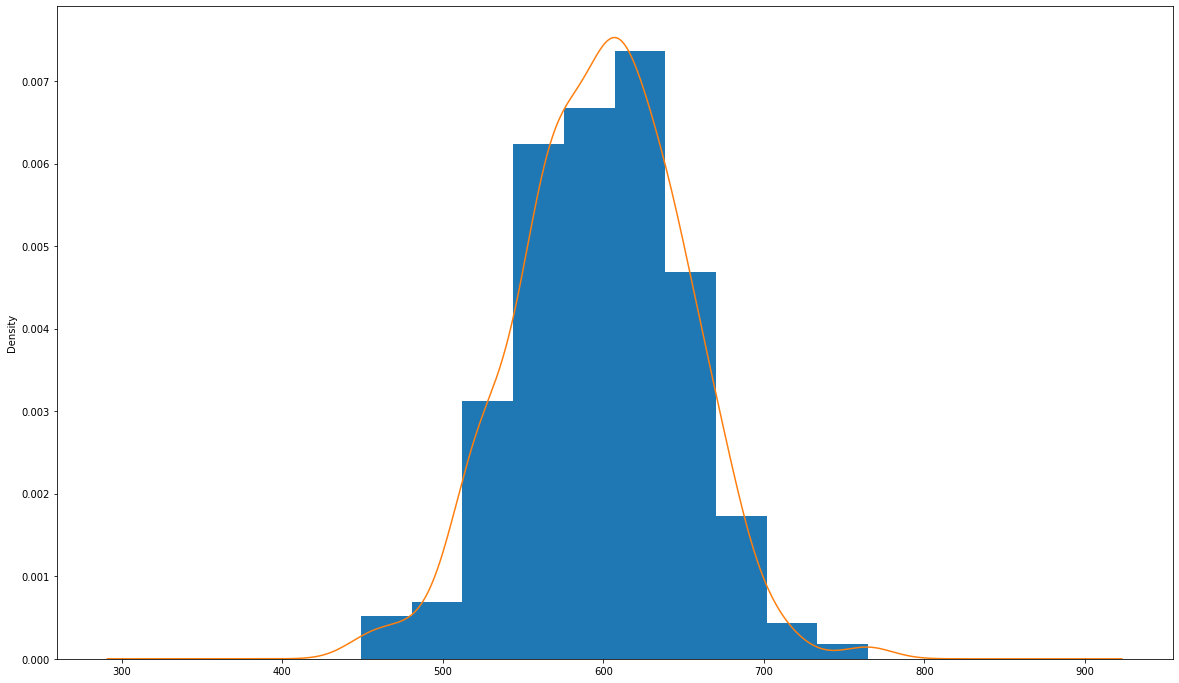

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
ax= df.groupby(['Date'])['Date'].count().plot(kind='hist', density=True)
df.groupby(['Date'])['Date'].count().plot(kind='kde')
plt.show()

In [19]:
df_count = df.groupby(['Date'])['Date'].agg(['count']).sort_values(by='Date').reset_index()
df_count

,Date,count
0,2019-01-01,687
1,2019-01-02,534
2,2019-01-03,561
3,2019-01-04,525
4,2019-01-05,552
...,...,...
360,2019-12-27,636
361,2019-12-28,659
362,2019-12-29,520
363,2019-12-30,600


In [20]:
# df_mean = df_count['count'].mean()
# df_std = df_count['count'].std()
# upper_limit = df_mean + 3*df_std
# lower_limit = df_mean - 3*df_std
# df_count[(df_count['count'] > upper_limit) | (df_count['count']<lower_limit)]

In [21]:
# min_threshold = df_count['count'].quantile(0.05)
# max_threshold = df_count['count'].quantile(0.95)
# mi_threshold, ma_threshold = df_count['count'].quantile([0.001,0.999])
# df_count[(df_count['count'] < mi_threshold) | (df_count['count'] > ma_threshold)]

In [26]:
q1 = df_count['count'].quantile(0.25)
q3 = df_count['count'].quantile(0.75)
iqr = q3 -q1
l_limit = q1 -1.5*iqr
u_limit = q3 + 1.5*iqr
df_count[(df_count['count'] < l_limit) | (df_count['count'] > u_limit)]

,Date,count
63,2019-03-05,456
110,2019-04-21,449
120,2019-05-01,765
181,2019-07-01,764
331,2019-11-28,456


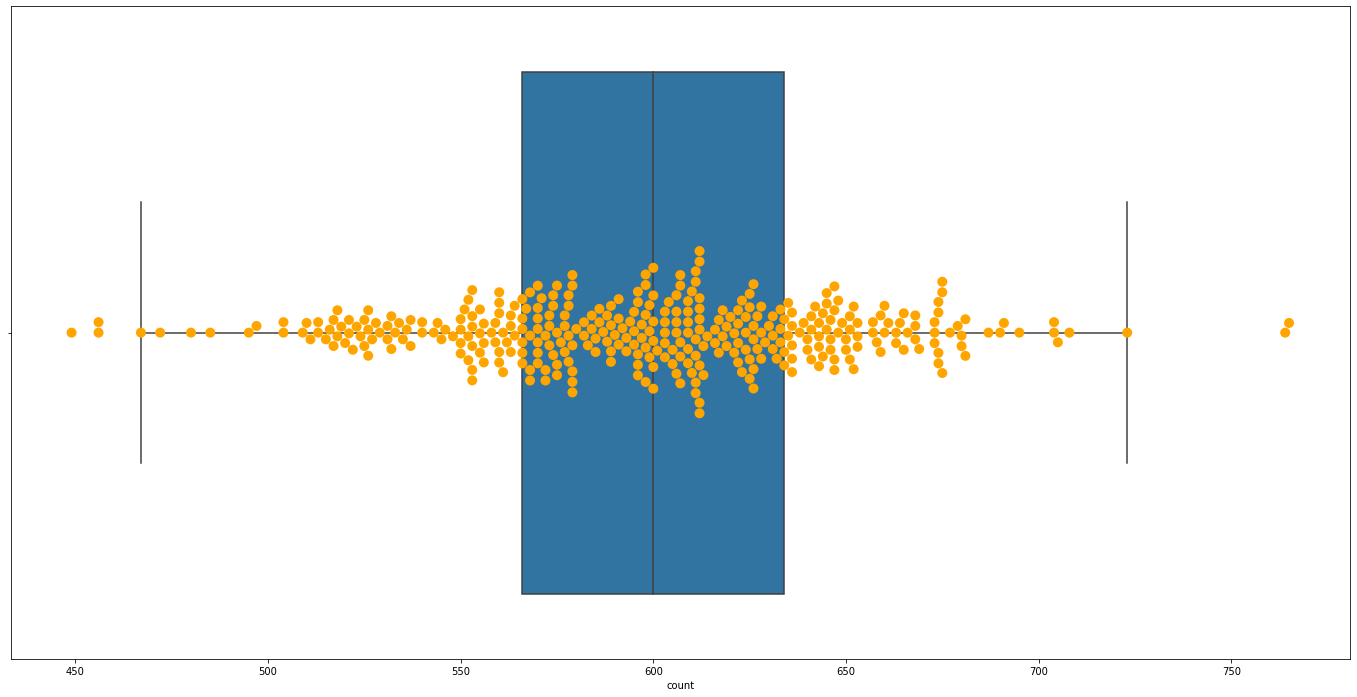

In [27]:
plt.figure(figsize=(24,12))
sns.boxplot(x='count', data=df_count, showfliers=False)
sns.swarmplot(x='count', data=df_count, color="orange", s=10)
plt.show()

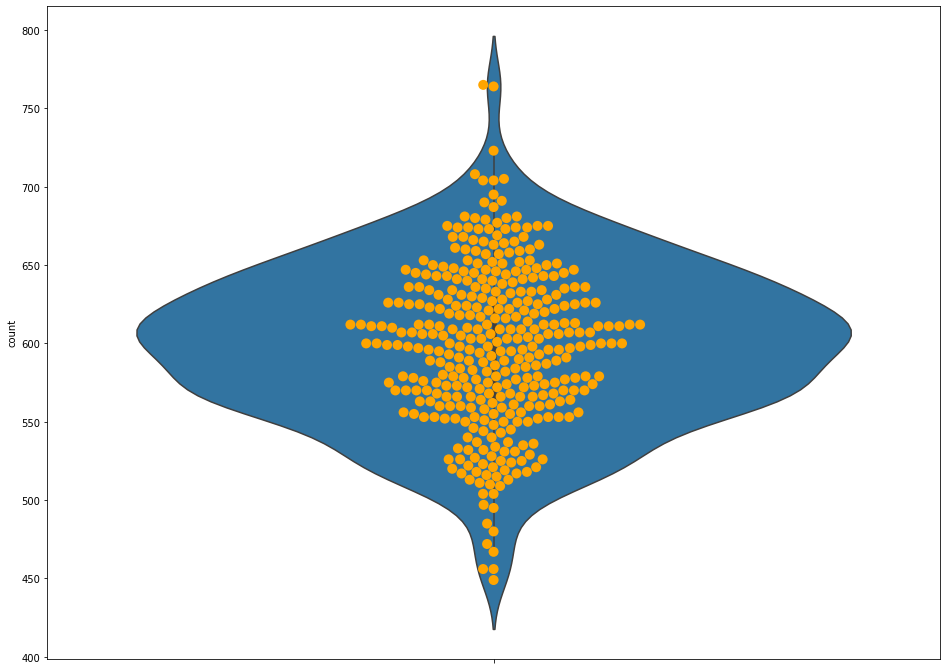

In [28]:
plt.figure(figsize=(16,12))
sns.violinplot(y='count', data=df_count)
sns.swarmplot(y='count', data=df_count, color="orange", s=10)
plt.show()

In [29]:
df['Description'].value_counts()

Theft from motor vehicle                     33062
Simple assault                               27138
Destruction, damage, vandalism               21617
All other larceny                            18440
Burglary, Breaking and Entering              16879
Intimidation                                 14135
Motor vehicle theft                          13075
Aggravated Assault                           12652
Shoplifting                                  10788
Robbery                                       9195
Drug, narcotic violations                     9028
Theft of motor vehicle parts or accessory     5861
Credit card, ATM fraud                        3894
Theft from building                           3546
False pretenses, swindle                      3028
Counterfeiting, forgery                       2833
Identify theft                                2597
Weapon law violations                         2148
Drug equipment violations                     1192
Forcible rape                  

In [33]:
df[df['StreetName']=='WESTHEIMER']['Description'].value_counts()

Theft from motor vehicle                     1435
Shoplifting                                  1023
Destruction, damage, vandalism                476
All other larceny                             474
Simple assault                                459
Burglary, Breaking and Entering               299
Intimidation                                  270
Robbery                                       218
Aggravated Assault                            189
Credit card, ATM fraud                        159
Drug, narcotic violations                     143
Theft from building                           139
Motor vehicle theft                           139
False pretenses, swindle                      136
Counterfeiting, forgery                       111
Theft of motor vehicle parts or accessory     100
Identify theft                                 65
Weapon law violations                          32
Embezzlement                                   30
Drug equipment violations                      22


In [34]:
df['Description'].value_counts().describe()

count       49.000000
mean      4457.714286
std       7714.520605
min          2.000000
25%        109.000000
50%        487.000000
75%       3894.000000
max      33062.000000
Name: Description, dtype: float64

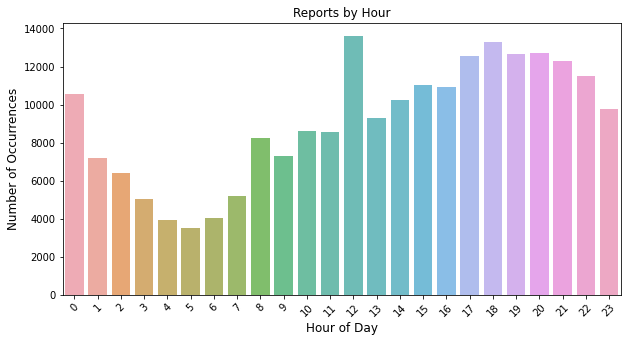

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Hour'].value_counts().index, y=df['Hour'].value_counts().values, alpha=0.8)
plt.title('Reports by Hour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Date

In [36]:
# df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df['Month'] = df['Date'].dt.month
column_move1 = df['Month']
df.drop(labels=['Month'], axis=1, inplace=True)
df.insert(2,'Month', column_move1)

In [38]:
df['Day'] = df['Date'].dt.day
column_move2 = df['Day']
df.drop(labels=['Day'], axis=1, inplace=True)
df.insert(3,'Day', column_move2)

In [39]:
df['Day_of_Week'] = df['Date'].dt.day_name()
column_move3 = df['Day_of_Week']
df.drop(labels=['Day_of_Week'], axis=1, inplace=True)
df.insert(4,'Day_of_Week', column_move3)

In [40]:
df['week_of_year'] = df['Date'].apply(lambda x: x.weekofyear)
column_move4 = df['week_of_year']
df.drop(labels=['week_of_year'], axis=1, inplace=True)
df.insert(5,'week_of_year', column_move4)

In [41]:
df['day_of_year'] = df['Date'].apply(lambda x: x.dayofyear)
column_move5 = df['day_of_year']
df.drop(labels=['day_of_year'], axis=1, inplace=True)
df.insert(6,'day_of_year', column_move5)

In [42]:
spring = range(3,6)
summer = range(6,9)
fall = range(9,11)
seasons = []

for s in df['Month']:
    # Conversion Process # 
    if s in spring:
        seasons.append('Spring')
    elif s in summer:
        seasons.append('Summer')
    elif s in fall:
        seasons.append('Fall')
    else:
        seasons.append('Winter')
df['season'] = pd.Series(seasons, index=df.index)

In [43]:
df.sample(10)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code,season
170973,134992319,2019-10-14,10,14,Monday,42,287,14,290,"Destruction, damage, vandalism",1,3B40,"Residence, Home (Includes Apartment)",4302,CASTOR,ST,NaN,77022,Fall
58211,46923719,2019-04-15,4,15,Monday,16,105,0,35B,Drug equipment violations,1,17E10,"Parking Lot, Garage",7101,ATWELL,DR,NaN,77081,Spring
102601,80889719,2019-06-25,6,25,Tuesday,26,176,19,13C,Intimidation,1,18F40,"Drug Store, Doctors Office, Hospital",1635,VOSS,RD,S,77057,Summer
76511,61062619,2019-05-14,5,14,Tuesday,20,134,19,290,"Destruction, damage, vandalism",1,18F60,"Parking Lot, Garage",7825,CORPORATE,DR,NaN,77036,Spring
125081,98292919,2019-07-31,7,31,Wednesday,31,212,22,23F,Theft from motor vehicle,1,1A40,Restaurant,3736,WESTHEIMER,RD,NaN,77027,Summer
19466,15734119,2019-02-05,2,5,Tuesday,6,36,17,13B,Simple assault,1,2A30,"Highway, Road, Street, Alley",3500,OAKRIDGE,ST,NaN,77009,Winter
102941,85182819,2019-06-26,6,26,Wednesday,26,177,10,23C,Shoplifting,1,20G30,Speciality Store,11805,WESTHEIMER,RD,NaN,77077,Summer
53576,43207819,2019-04-07,4,7,Sunday,14,97,1,35A,"Drug, narcotic violations",1,16E30,"Highway, Road, Street, Alley",14100,MAIN,ST,NaN,77035,Spring
157936,128507119,2019-09-23,9,23,Monday,39,266,10,13C,Intimidation,1,16E30,"Grocery, Supermarket",6100,FUQUA,ST,W,77085,Fall
161603,127349419,2019-09-29,9,29,Sunday,39,272,2,13B,Simple assault,1,18F50,"Highway, Road, Street, Alley",8900,PAGEWOOD,LN,NaN,77063,Fall


In [44]:
def seasons(df):
  if (df['Month'] == 12) | (df['Month'] >=1) & (df['Month'] <=2):
    return 'Winter'
  elif (df['Month'] >=3) & (df['Month'] <=5):
    return 'Spring'
  elif (df['Month'] >=6) & (df['Month'] <=8):
    return 'Summer'        
  else:
    return "Fall"
df['season'] = df.apply(seasons, axis=1)

In [45]:
df.sample(10)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code,season
169160,133624019,2019-10-11,10,11,Friday,41,284,13,240,Motor vehicle theft,1,16E20,"Residence, Home (Includes Apartment)",4638,CURLY OAKS,DR,NaN,77053,Fall
1039,998819,2019-01-02,1,2,Wednesday,1,2,17,240,Motor vehicle theft,1,15E30,"Highway, Road, Street, Alley",3700,BELLEFONTAINE,ST,NaN,77025,Winter
110260,86872319,2019-07-08,7,8,Monday,28,189,3,290,"Destruction, damage, vandalism",1,12D10,"Residence, Home (Includes Apartment)",10910,GULF,FWY,NaN,77075,Summer
116946,92449119,2019-07-19,7,19,Friday,29,200,0,23D,Theft from building,1,1A20,"Bar, Nightclub",2400,BRAZOS,ST,NaN,77006,Summer
143808,113075819,2019-08-30,8,30,Friday,35,242,19,23F,Theft from motor vehicle,1,20G30,"Parking Lot, Garage",3505,DAIRY ASHFORD,RD,S,77082,Summer
190846,151048519,2019-11-16,11,16,Saturday,46,320,12,26B,"Credit card, ATM fraud",1,3B50,"Department, Discount Store",4446,NORTH,FWY,NaN,77022,Fall
4198,3308019,2019-01-08,1,8,Tuesday,2,8,15,35B,Drug equipment violations,1,13D10,"Highway, Road, Street, Alley",3300,PECAN,NaN,NaN,77087,Winter
189241,161976019,2019-11-13,11,13,Wednesday,46,317,17,23F,Theft from motor vehicle,1,18F20,"Parking Lot, Garage",5000,WESTHEIMER,RD,NaN,77056,Fall
145581,114247219,2019-09-02,9,2,Monday,36,245,16,23C,Shoplifting,1,20G50,"Department, Discount Store",900,GESSNER,RD,NaN,77024,Fall
47451,39005419,2019-03-27,3,27,Wednesday,13,86,20,13B,Simple assault,1,11H10,"Residence, Home (Includes Apartment)",1724,PASADENA,NaN,NaN,77023,Spring


In [46]:
s_count = df.groupby(['season','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='season')
s_count

,season,Description,count
0,Summer,Theft from motor vehicle,8778
1,Fall,Theft from motor vehicle,8416
2,Spring,Theft from motor vehicle,8151
3,Winter,Theft from motor vehicle,7717


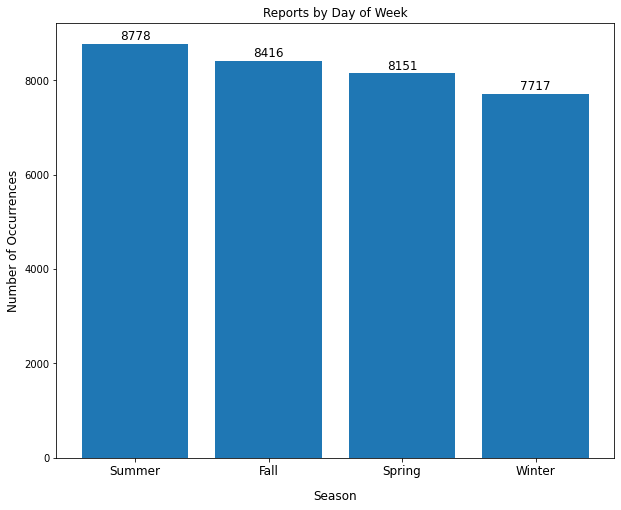

In [47]:
figure, axis = plt.subplots(figsize=(10,8))
plot = axis.bar('season', 'count', data=s_count)
for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002* height, '%d' % int(height), ha='center', va = 'bottom', fontsize=12)
plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Season', fontsize=12, labelpad=12)
plt.xticks(fontsize = 12)
plt.show()

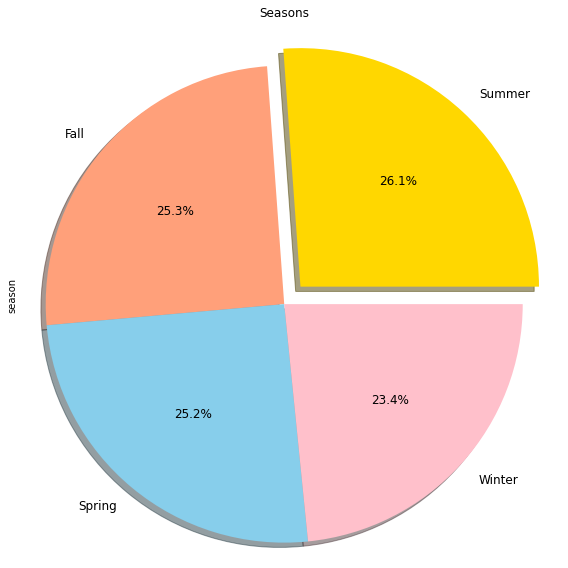

In [48]:
seasons_count = df['season'].value_counts()
colors = ['gold','lightsalmon','skyblue','pink']
explode = (0.1, 0, 0, 0)
seasons_count.plot(kind = 'pie', title='Seasons', explode= explode, subplots=True,
                       autopct='%1.1f%%',shadow=True,figsize=(8,8), fontsize= 12, colors= colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

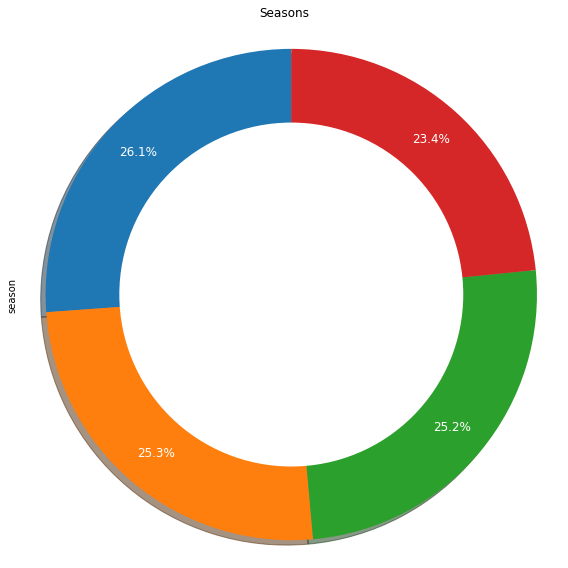

In [44]:
seasons_count = df['season'].value_counts()
explode = (0.1, 0, 0, 0)
seasons_count.plot(kind = 'pie', title='Seasons', subplots=True,
                       autopct='%1.1f%%',shadow=True,figsize=(8,8), fontsize= 12, pctdistance=0.85, startangle=90, textprops={'color':"w"})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Incident       218428 non-null  int64         
 1   Date           218428 non-null  datetime64[ns]
 2   Month          218428 non-null  int64         
 3   Day            218428 non-null  int64         
 4   Day_of_Week    218428 non-null  object        
 5   week_of_year   218428 non-null  int64         
 6   day_of_year    218428 non-null  int64         
 7   Hour           218428 non-null  int64         
 8   NIBRS Class    218428 non-null  object        
 9   Description    218428 non-null  object        
 10  Offense Count  218428 non-null  int64         
 11  Beat           218307 non-null  object        
 12  Premise        218428 non-null  object        
 13  Block Range    218428 non-null  int64         
 14  StreetName     218428 non-null  object        
 15  

In [46]:
df.isnull().mean()

Incident         0.000000
Date             0.000000
Month            0.000000
Day              0.000000
Day_of_Week      0.000000
week_of_year     0.000000
day_of_year      0.000000
Hour             0.000000
NIBRS Class      0.000000
Description      0.000000
Offense Count    0.000000
Beat             0.000554
Premise          0.000000
Block Range      0.000000
StreetName       0.000000
Street Type      0.080873
Suffix           0.860567
ZIP Code         0.012379
season           0.000000
dtype: float64

In [47]:
df.drop('Suffix', axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Incident       218428 non-null  int64         
 1   Date           218428 non-null  datetime64[ns]
 2   Month          218428 non-null  int64         
 3   Day            218428 non-null  int64         
 4   Day_of_Week    218428 non-null  object        
 5   week_of_year   218428 non-null  int64         
 6   day_of_year    218428 non-null  int64         
 7   Hour           218428 non-null  int64         
 8   NIBRS Class    218428 non-null  object        
 9   Description    218428 non-null  object        
 10  Offense Count  218428 non-null  int64         
 11  Beat           218307 non-null  object        
 12  Premise        218428 non-null  object        
 13  Block Range    218428 non-null  int64         
 14  StreetName     218428 non-null  object        
 15  

In [49]:
df['Month'].value_counts()

5     19644
8     19459
7     19412
10    18886
12    18657
6     18241
9     18157
11    18150
4     17968
3     17382
1     16835
2     15637
Name: Month, dtype: int64

In [50]:
m_count = df.groupby(['Month'])['Incident'].agg(['count']).sort_values(by='Month').reset_index()
m_count['Month'] = pd.to_datetime(m_count['Month'], format='%m').dt.month_name()
m_count

,Month,count
0,January,16835
1,February,15637
2,March,17382
3,April,17968
4,May,19644
5,June,18241
6,July,19412
7,August,19459
8,September,18157
9,October,18886


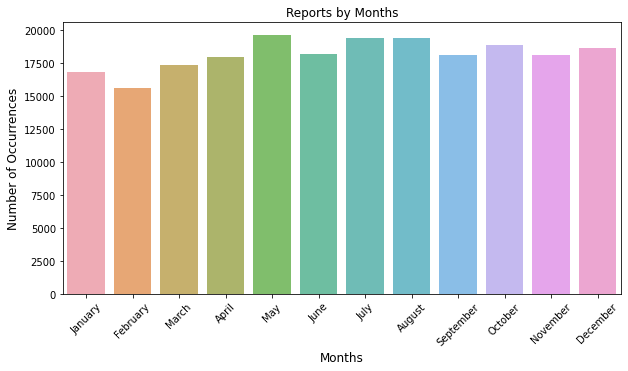

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='count', data= m_count, alpha=0.8)
plt.title('Reports by Months')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [52]:
df['Day_of_Week'].value_counts()

Friday       32788
Saturday     31600
Monday       31425
Tuesday      31298
Wednesday    31237
Thursday     30635
Sunday       29445
Name: Day_of_Week, dtype: int64

In [53]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [54]:
d_count = df.groupby(['Day_of_Week'])['Incident'].agg(['count']).sort_values(by='Day_of_Week').reindex(cats).reset_index()
d_count

,Day_of_Week,count
0,Sunday,29445
1,Monday,31425
2,Tuesday,31298
3,Wednesday,31237
4,Thursday,30635
5,Friday,32788
6,Saturday,31600


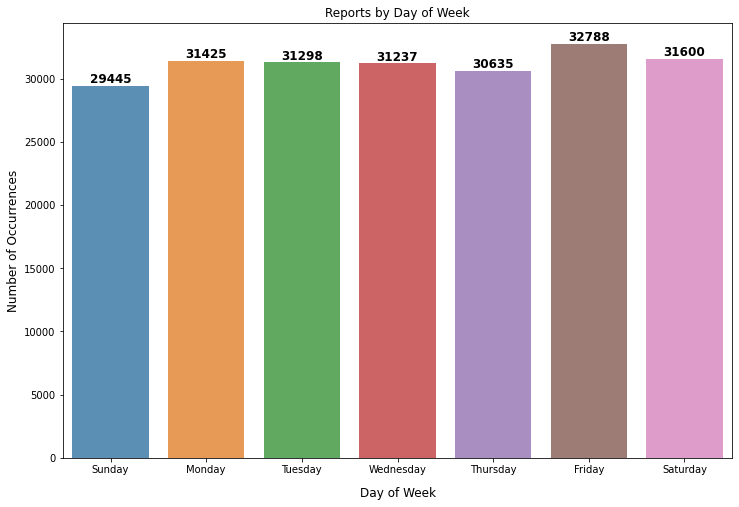

In [55]:
plt.figure(figsize=(12,8))
graph = sns.barplot(x='Day_of_Week', y='count', data= d_count, alpha=0.8)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', fontsize =12,
                    color= 'black', weight="bold")
plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12, labelpad=12)
plt.xticks(rotation=0)
plt.show()

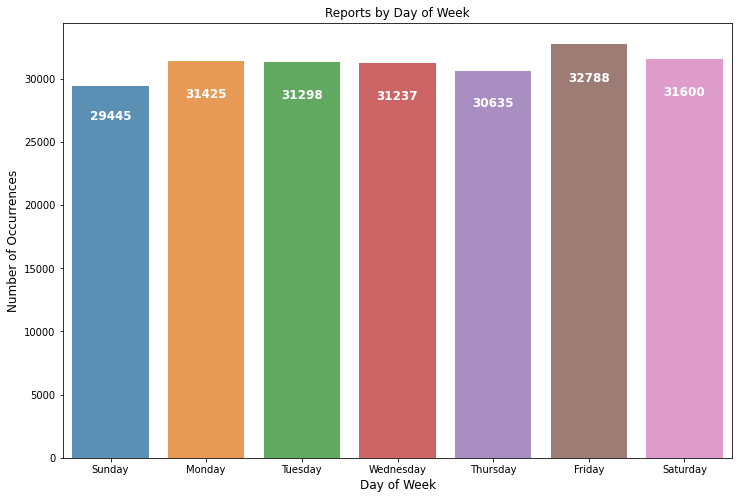

In [56]:
plt.figure(figsize=(12,8))
graph = sns.barplot(x='Day_of_Week', y='count', data= d_count, alpha=0.8)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()*0.9),
                    ha='center', va='bottom', fontsize =12,
                    color= 'white', weight="bold")
plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation=0)
plt.show()

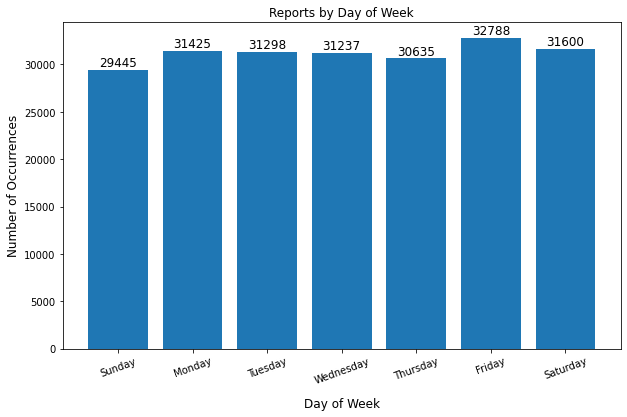

In [57]:
figure, axis = plt.subplots(figsize=(10,6))
plot = axis.bar('Day_of_Week', 'count', data=d_count)
for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002* height, '%d' % int(height), ha='center', va = 'bottom', fontsize=12)
plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12, labelpad=12)
plt.xticks(rotation=20)
plt.show()

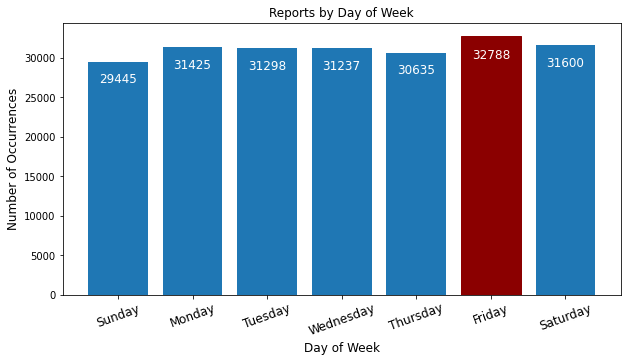

In [58]:
dn_count = df['Day_of_Week'].value_counts().sort_index()
figure, axis = plt.subplots(figsize=(10,5))
plot = axis.bar('Day_of_Week', 'count', data=d_count)
plot[5].set_color('darkred')
for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() /2., 0.9* height, '%d' % int(height), ha='center', va = 'bottom', color='white', fontsize=12)
plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation=20, fontsize=12)
plt.show()

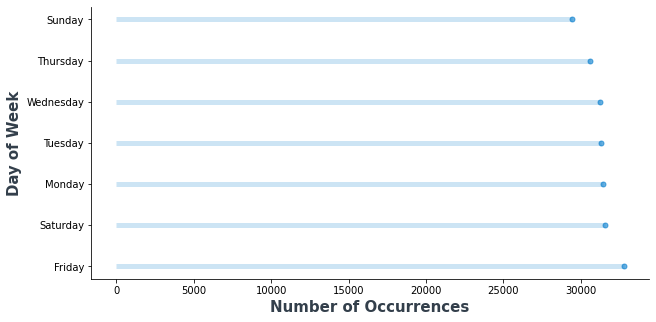

In [59]:
dn_count = df['Day_of_Week'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
plt.hlines(y=dn_count.index, xmin=0, xmax=dn_count.values, color='#007acc', alpha=0.2, linewidth=5)
plt.plot(dn_count.values, dn_count.index, "o", markersize=5, color='#007acc', alpha=0.6)
ax.set_xlabel('Number of Occurrences', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Day of Week', fontsize=15, fontweight='black', color = '#333F4B')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [60]:
df['Hour'].value_counts()

12    13612
18    13295
20    12717
19    12644
17    12564
21    12301
22    11525
15    11031
16    10905
0     10556
14    10257
23     9758
13     9278
10     8627
11     8537
8      8251
9      7271
1      7206
2      6405
7      5176
3      5032
6      4043
4      3944
5      3493
Name: Hour, dtype: int64

In [64]:
h_count = df.groupby(['Hour'])['Incident'].agg(['count']).sort_values(by='Hour').reset_index()
h_count

,Hour,count
0,0,10556
1,1,7206
2,2,6405
3,3,5032
4,4,3944
5,5,3493
6,6,4043
7,7,5176
8,8,8251
9,9,7271


In [65]:
q1 = h_count['count'].quantile(0.25)
q2 = h_count['count'].quantile(0.50)
q3 = h_count['count'].quantile(0.75)
mean = h_count['count'].mean()
def negative_red(val):
    color = 'red' if val < q1 else ('green' if val > q3 else ('background-color: lightblue' if val == q2 else ''))
    return 'color: %s' % color
h_count.style.applymap(negative_red, subset=['count'])

,Hour,count
0,0,10556
1,1,7206
2,2,6405
3,3,5032
4,4,3944
5,5,3493
6,6,4043
7,7,5176
8,8,8251
9,9,7271


In [64]:
h_count['count'].describe()

count       24.000000
mean      9101.166667
std       3187.165412
min       3493.000000
25%       7005.750000
50%       9518.000000
75%      11719.000000
max      13612.000000
Name: count, dtype: float64

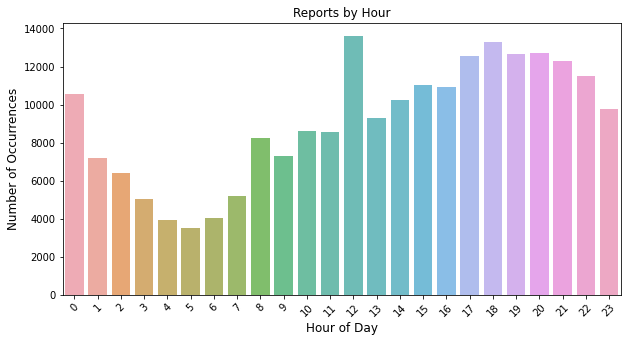

In [65]:
dayname_count  = df['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=dayname_count.index, y=dayname_count.values, alpha=0.8)
plt.title('Reports by Hour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [66]:
df['week_of_year'].value_counts()

18    4672
31    4658
1     4566
21    4551
27    4488
40    4426
22    4419
39    4414
34    4414
49    4400
33    4396
32    4388
47    4358
30    4353
24    4339
20    4339
43    4324
28    4312
17    4299
23    4296
29    4291
19    4285
42    4276
51    4274
44    4272
48    4269
36    4251
35    4212
45    4195
14    4192
25    4168
50    4166
37    4159
15    4153
26    4149
41    4117
38    4089
46    4032
13    4000
16    3991
52    3989
7     3975
12    3968
5     3956
6     3930
11    3923
8     3869
9     3849
4     3789
2     3762
10    3738
3     3727
Name: week_of_year, dtype: int64

In [61]:
w_count = df.groupby(['week_of_year'])['Incident'].agg(['count']).sort_values(by='week_of_year').reset_index()
w_count.head()

,week_of_year,count
0,1,4566
1,2,3762
2,3,3727
3,4,3789
4,5,3956


In [62]:
w_count['count'].quantile(0.25)

3997.75

In [63]:
def highlight(val):
    yellow = 'background-color: lightgreen' if val < 3997.75 else ('background-color: lightblue' if val > 4354.25 else '')
    return yellow
w_count.style.applymap(highlight, subset=['count'])

,week_of_year,count
0,1,4566
1,2,3762
2,3,3727
3,4,3789
4,5,3956
5,6,3930
6,7,3975
7,8,3869
8,9,3849
9,10,3738


In [69]:
w_count['count'].describe()

count      52.000000
mean     4200.538462
std       233.436935
min      3727.000000
25%      3997.750000
50%      4260.000000
75%      4354.250000
max      4672.000000
Name: count, dtype: float64

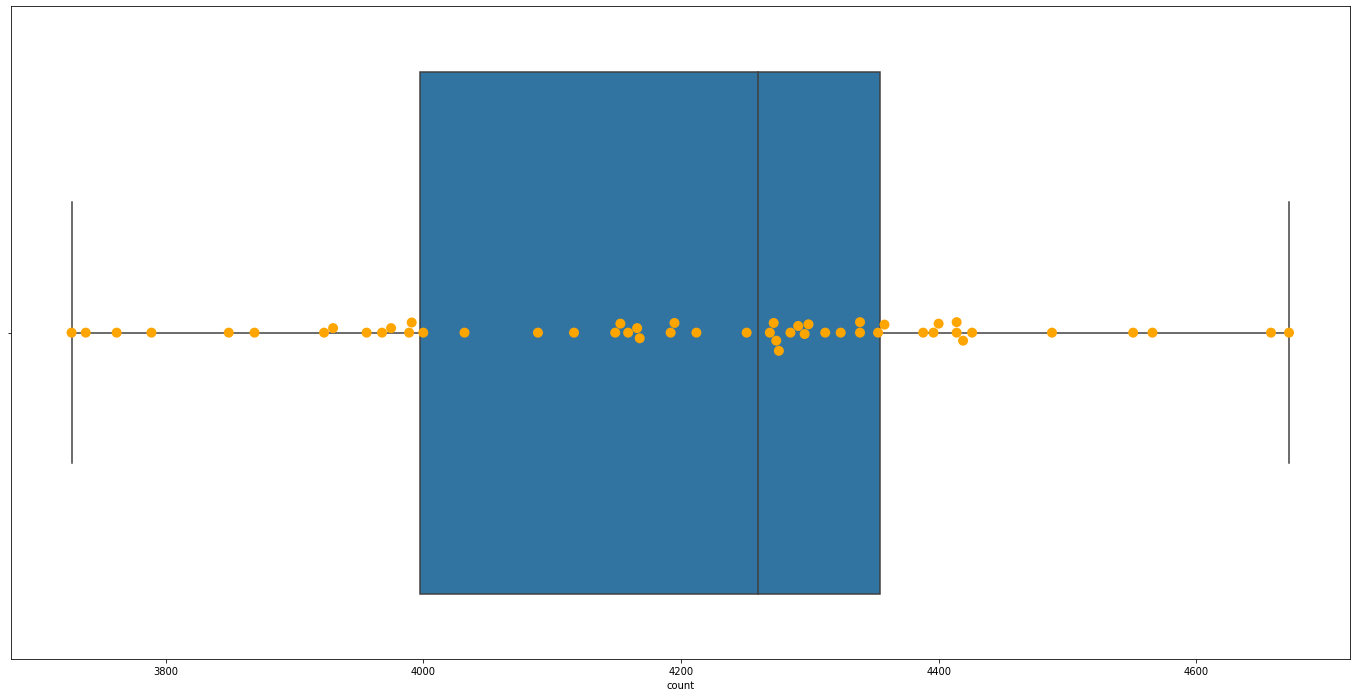

In [70]:
plt.figure(figsize=(24,12))
sns.boxplot(x='count', data=w_count, showfliers=False)
sns.swarmplot(x='count', data=w_count, color="orange", s=10)
plt.show()

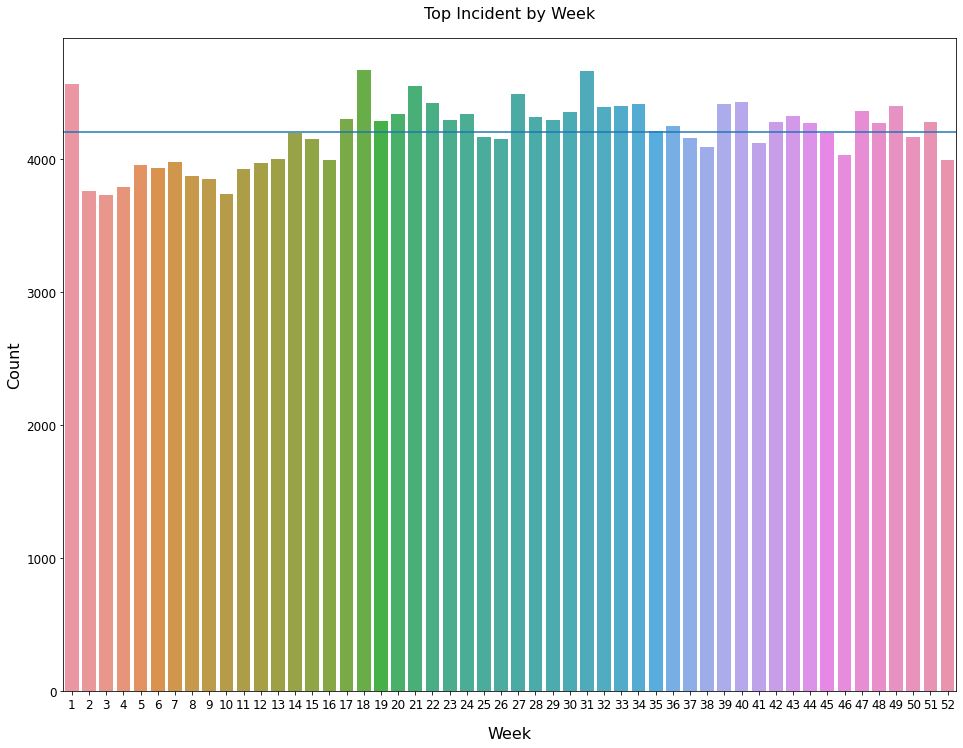

In [71]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="week_of_year", y="count", data=w_count, dodge=False)
plt.title('Top Incident by Week', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
mean = w_count['count'].mean()
ax.axhline(mean)
plt.show()

In [72]:
#Most Incidents by Day of Week
df2 = df.groupby(['Day_of_Week','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Day_of_Week')
df2= df2.set_index('Day_of_Week').reindex(cats).reset_index()
df2

,Day_of_Week,Description,count
0,Sunday,Simple assault,4844
1,Monday,Theft from motor vehicle,4907
2,Tuesday,Theft from motor vehicle,4997
3,Wednesday,Theft from motor vehicle,5134
4,Thursday,Theft from motor vehicle,4924
5,Friday,Theft from motor vehicle,5114
6,Saturday,Simple assault,4564


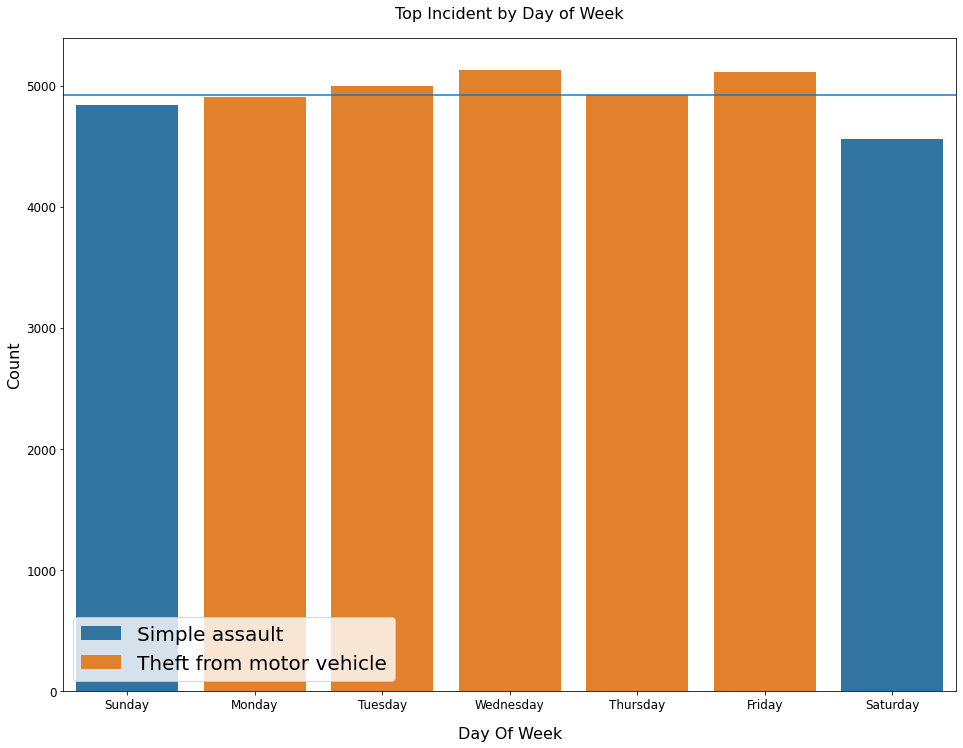

In [73]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="Day_of_Week", y="count", data=df2, hue='Description', dodge=False)
plt.title('Top Incident by Day of Week', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Day Of Week', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', prop={'size':20})
mean = df2['count'].mean()
ax.axhline(mean)
plt.show()

In [74]:
df[df['Day_of_Week']=='Sunday']['Description'].value_counts()[:10] 

Simple assault                     4844
Theft from motor vehicle           3616
Destruction, damage, vandalism     3205
Aggravated Assault                 2240
All other larceny                  2196
Intimidation                       1999
Burglary, Breaking and Entering    1993
Motor vehicle theft                1765
Shoplifting                        1499
Robbery                            1359
Name: Description, dtype: int64

In [75]:
## Most Incidents by Month
df3 = df.groupby(['Month','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Month')
df3 = df3.sort_values(by='Month')
df3['Month'] = pd.to_datetime(df3['Month'], format='%m').dt.month_name()
df3 = df3.reset_index(drop=True)
df3


,Month,Description,count
0,January,Theft from motor vehicle,2410
1,February,Theft from motor vehicle,2318
2,March,Theft from motor vehicle,2380
3,April,Theft from motor vehicle,2705
4,May,Theft from motor vehicle,3066
5,June,Theft from motor vehicle,2649
6,July,Theft from motor vehicle,3168
7,August,Theft from motor vehicle,2961
8,September,Theft from motor vehicle,2558
9,October,Theft from motor vehicle,2865


In [76]:
[x for x in df3["Month"]]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

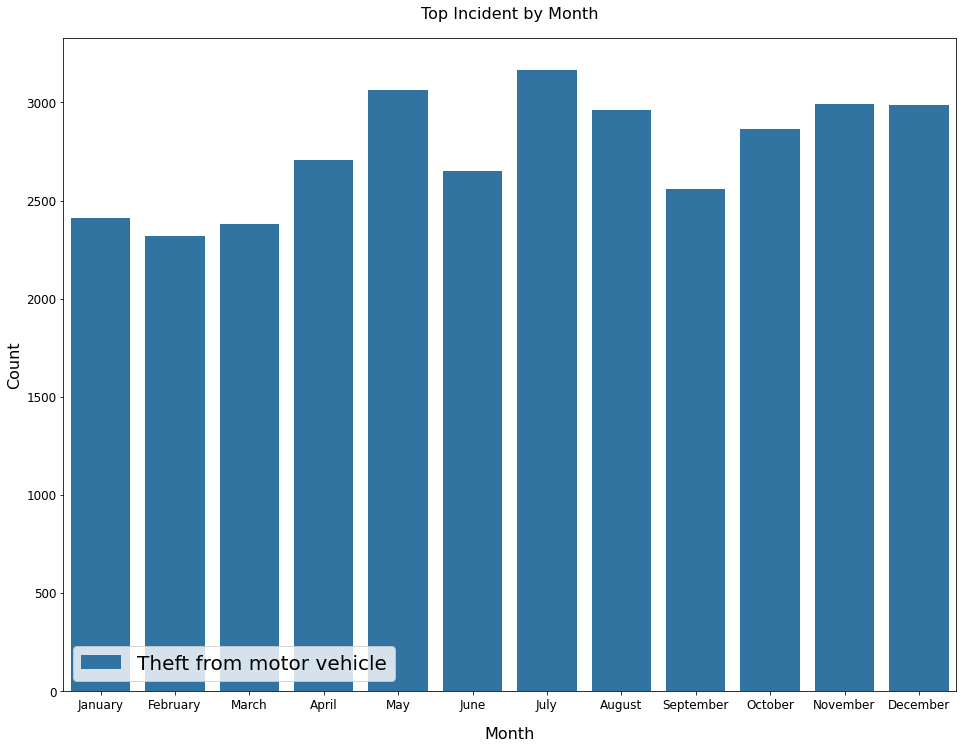

In [77]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="Month", y="count", data=df3, hue='Description', dodge=False)
plt.title('Top Incident by Month', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', prop={'size':20})
plt.show()

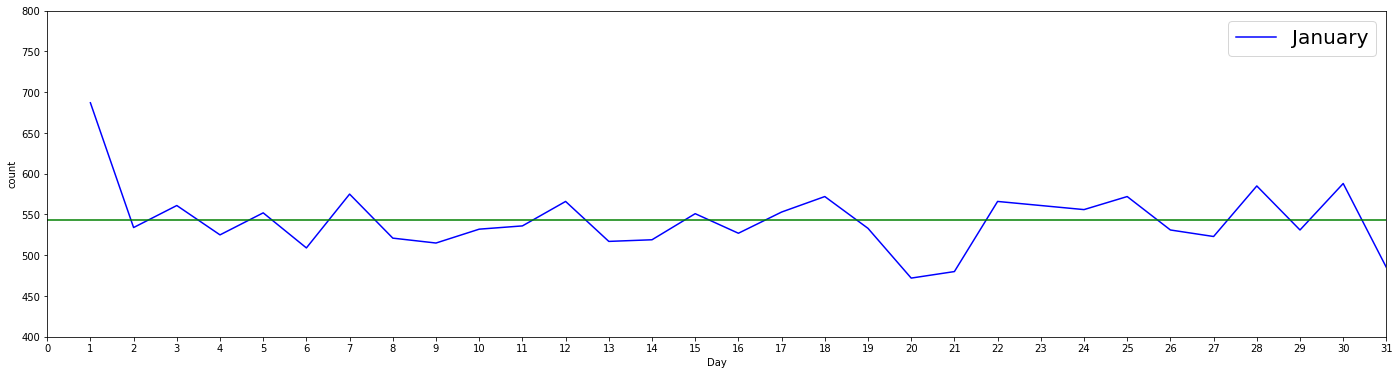

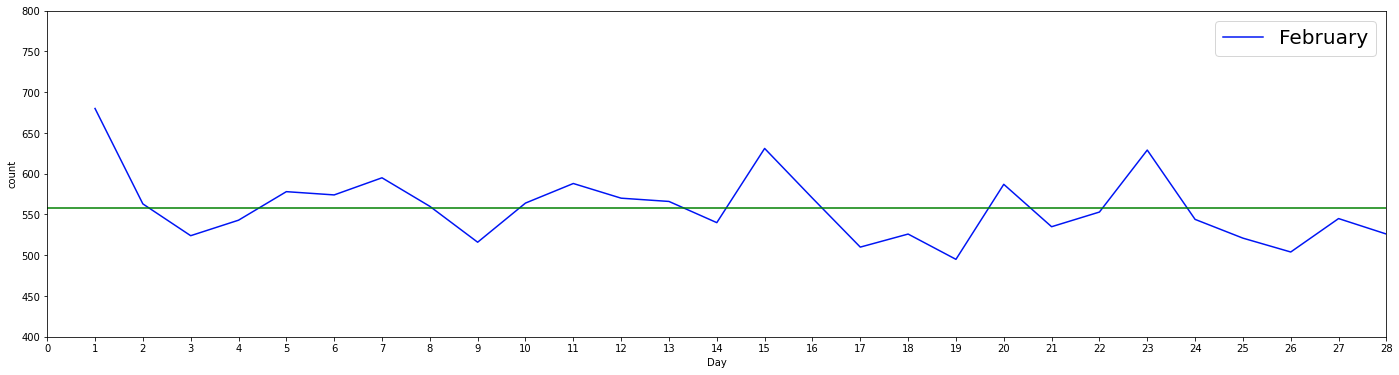

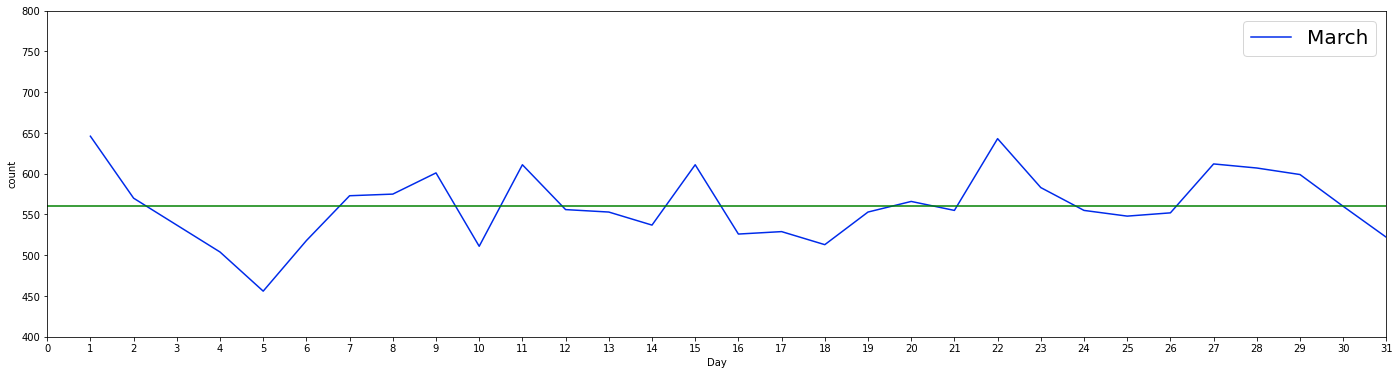

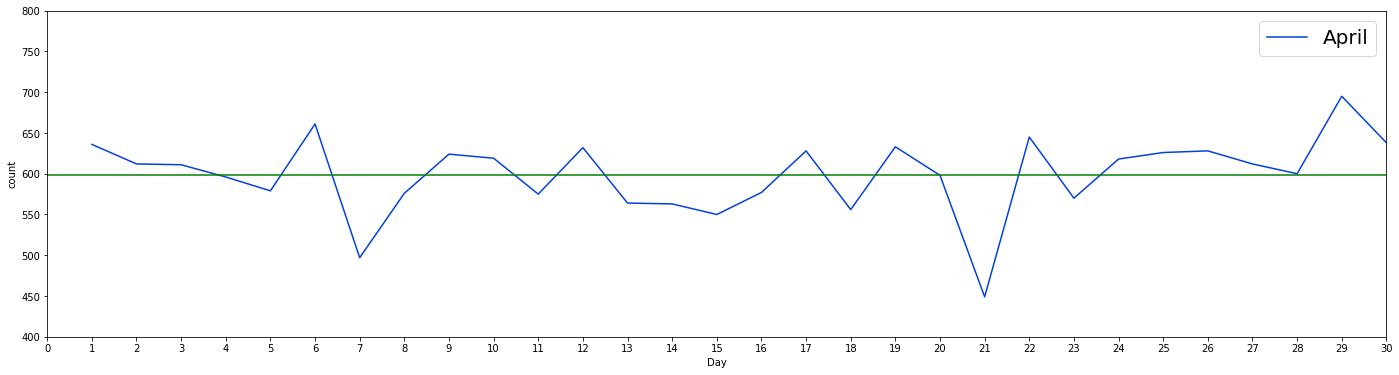

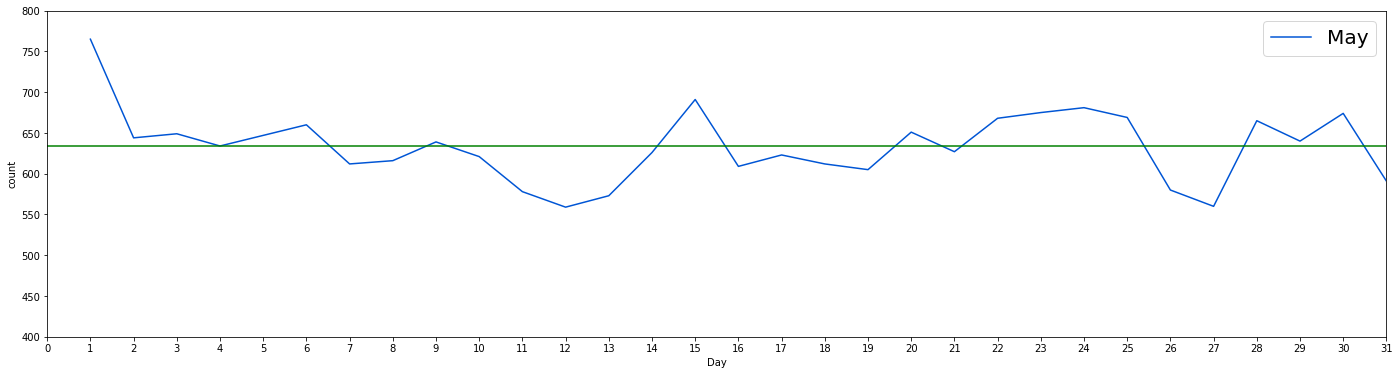

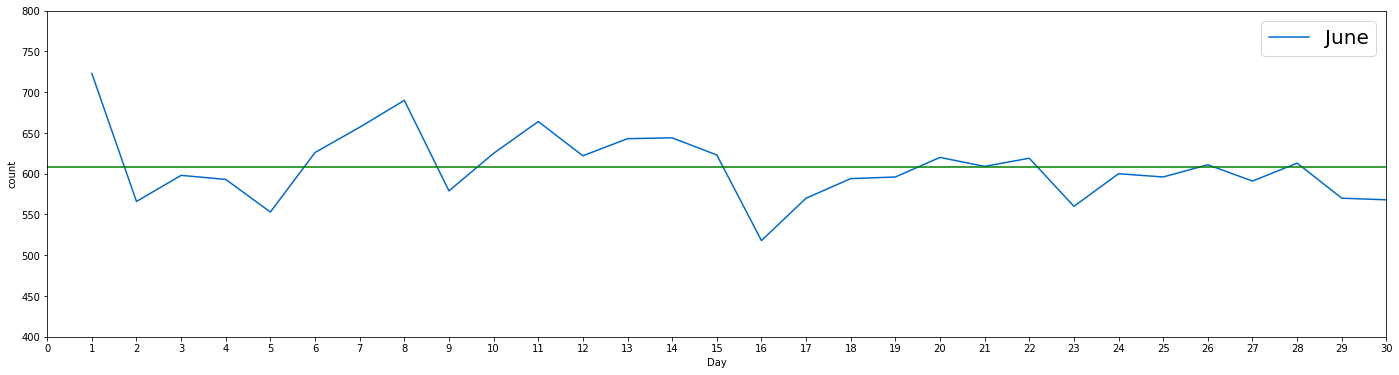

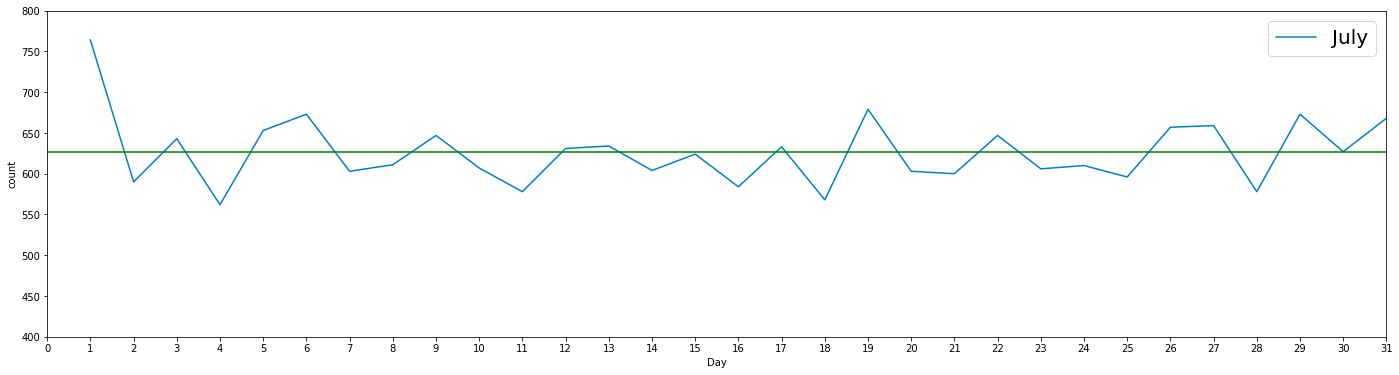

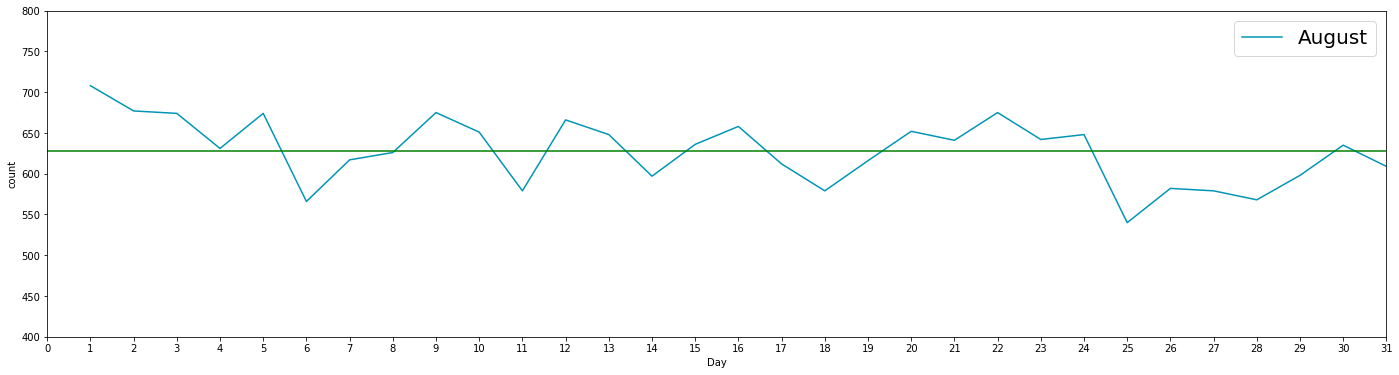

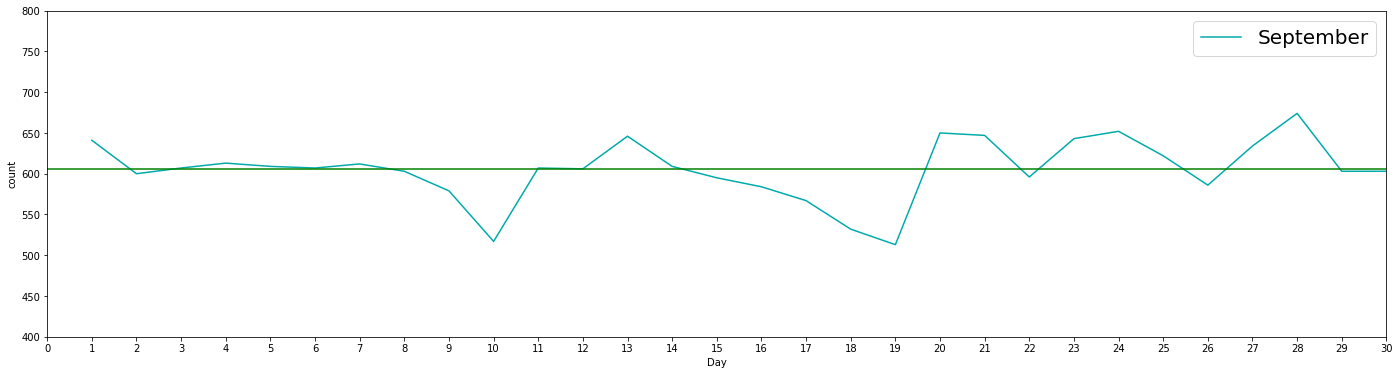

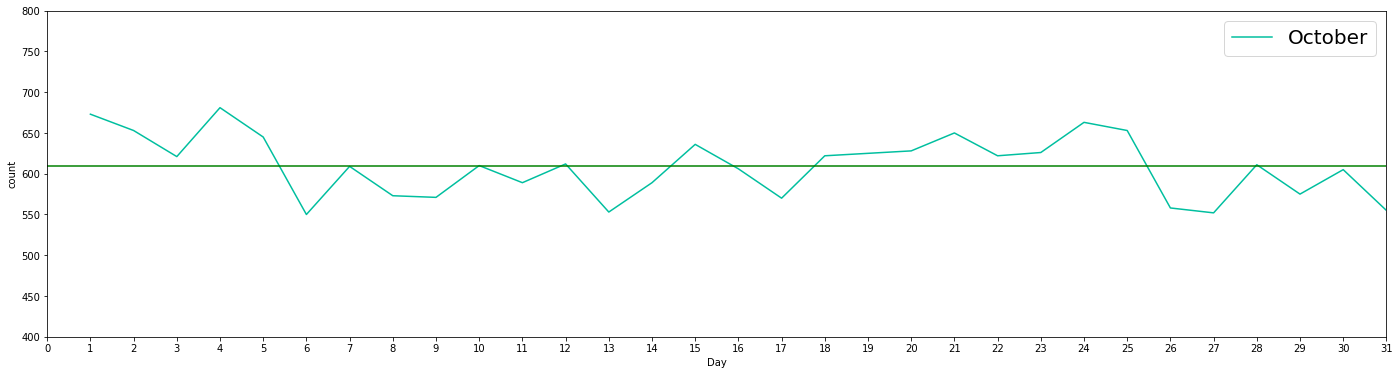

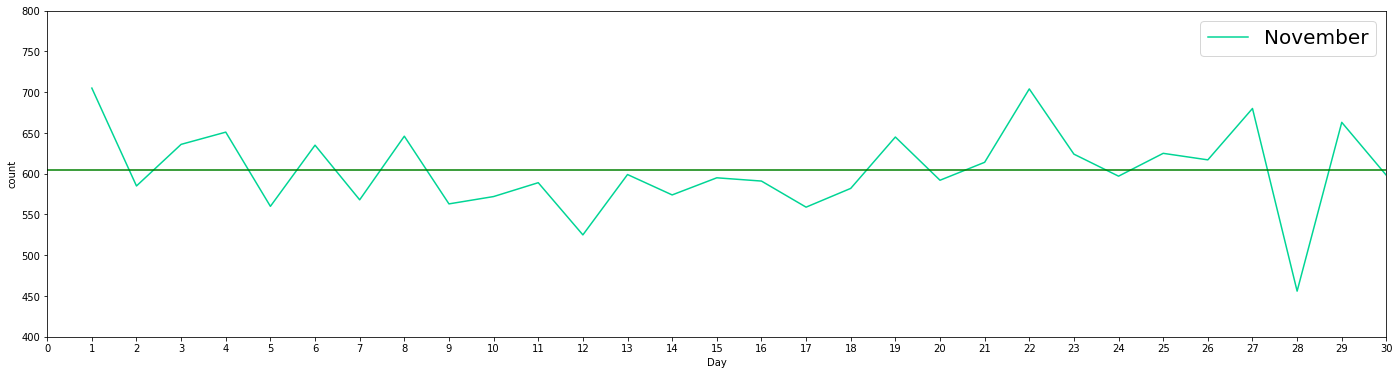

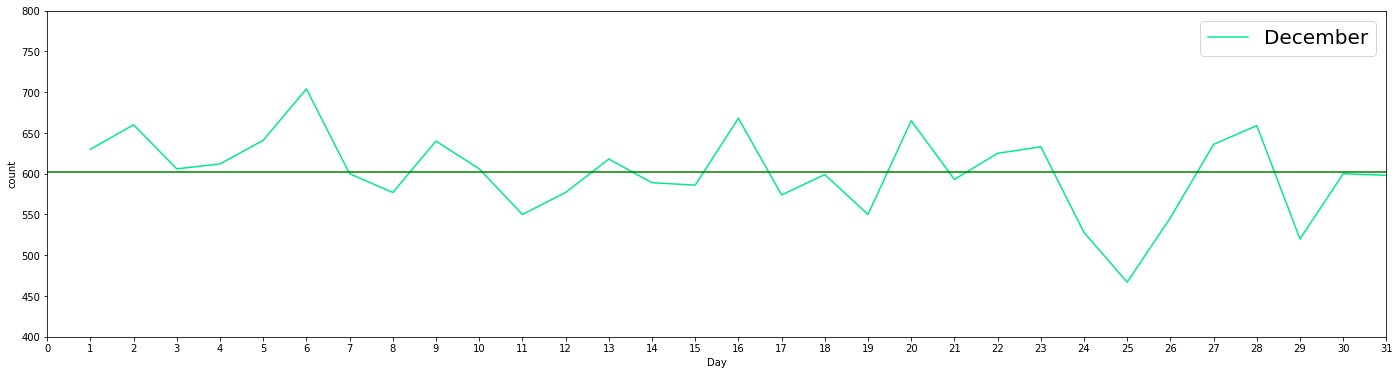

In [78]:
d = [x for x in df['Month'].value_counts().sort_index().index]
for y in range(len(d)):
    cmap = plt.get_cmap("winter", len(d)+1)
    #months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    months = [x for x in pd.to_datetime(df['Month'], format='%m').dt.month_name().unique()]
    data = df[df['Month']==d[y]].groupby(['Day'])['Day'].agg(['count'])
    fig, ax = plt.subplots(figsize=(24,6), subplot_kw={'ylim': (400,800)})
    ax = sns.lineplot(data=data, x="Day", y="count", color = cmap(y), label=months[y])
    mean = data['count'].mean()
    ax.axhline(mean, color='green')
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    vals = range(len(df[df['Month']==d[y]]['Day'].unique())+1)
    plt.xticks(vals)
    plt.show()

In [36]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())
for x in holidays:
    print(x.strftime('%Y-%m-%d'))

2019-01-01
2019-01-21
2019-02-18
2019-05-27
2019-07-04
2019-09-02
2019-10-14
2019-11-11
2019-11-28
2019-12-25


In [37]:
holi_date = [x.strftime('%Y-%m-%d') for x in holidays]
holi_date

['2019-01-01',
 '2019-01-21',
 '2019-02-18',
 '2019-05-27',
 '2019-07-04',
 '2019-09-02',
 '2019-10-14',
 '2019-11-11',
 '2019-11-28',
 '2019-12-25']

In [82]:
for y in range(len(holi_date)):
    z = df[df['Date']==holi_date[y]].groupby(['Hour'])['Incident'].agg(['count'])
    print(z)

      count
Hour       
0        97
1        30
2        43
3        24
4        15
5        14
6        10
7        17
8        25
9        11
10       29
11       17
12       83
13       18
14       20
15       26
16       26
17       28
18       33
19       23
20       34
21       26
22       17
23       21
      count
Hour       
0        24
1        21
2        21
3        11
4        11
5         8
6         8
7         8
8        15
9        13
10       20
11       31
12       26
13       17
14       18
15       27
16       26
17       24
18       37
19       32
20       25
21       20
22       24
23       13
      count
Hour       
0        25
1        14
2         9
3         8
4         9
5         7
6        13
7        15
8        20
9        25
10       15
11       24
12       40
13       28
14       16
15       39
16       35
17       30
18       30
19       32
20       26
21       29
22       16
23       21
      count
Hour       
0        39
1        22
2        17
3   

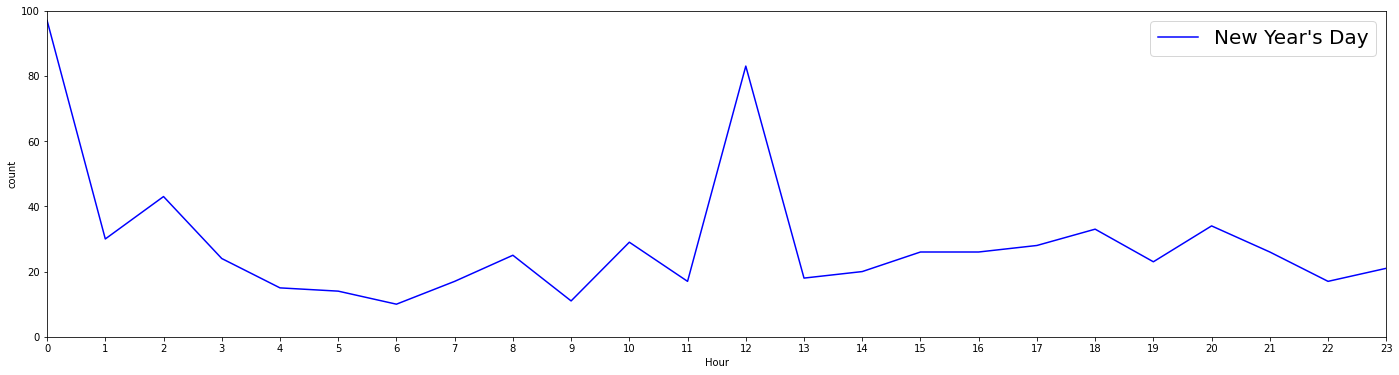

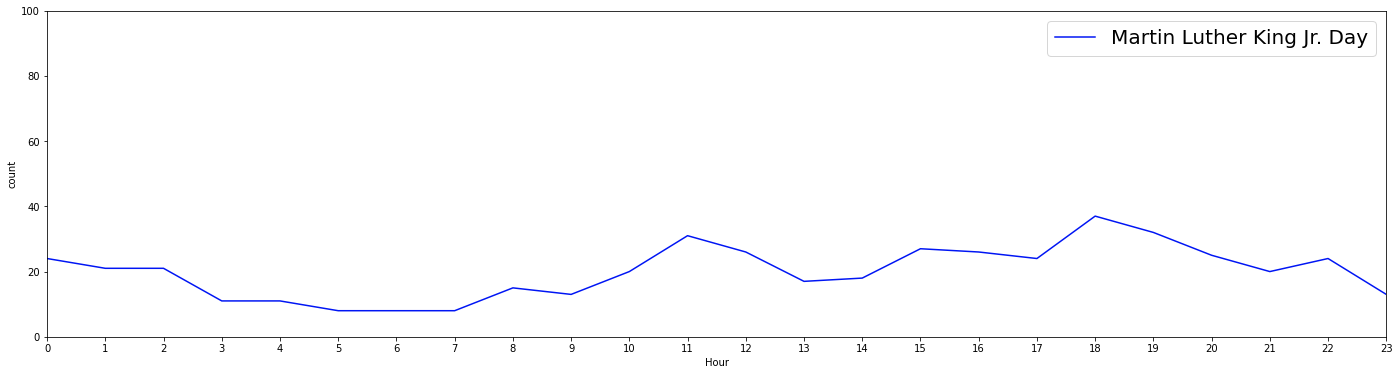

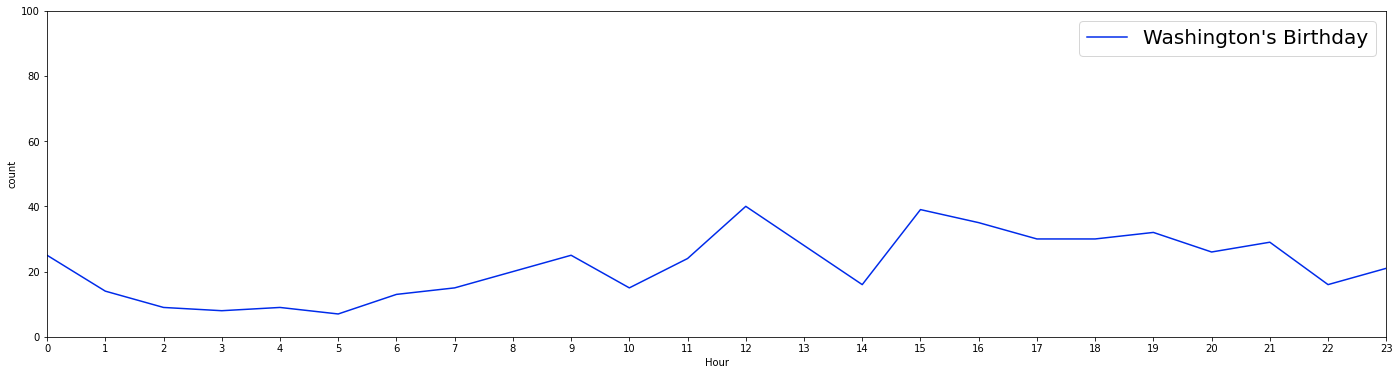

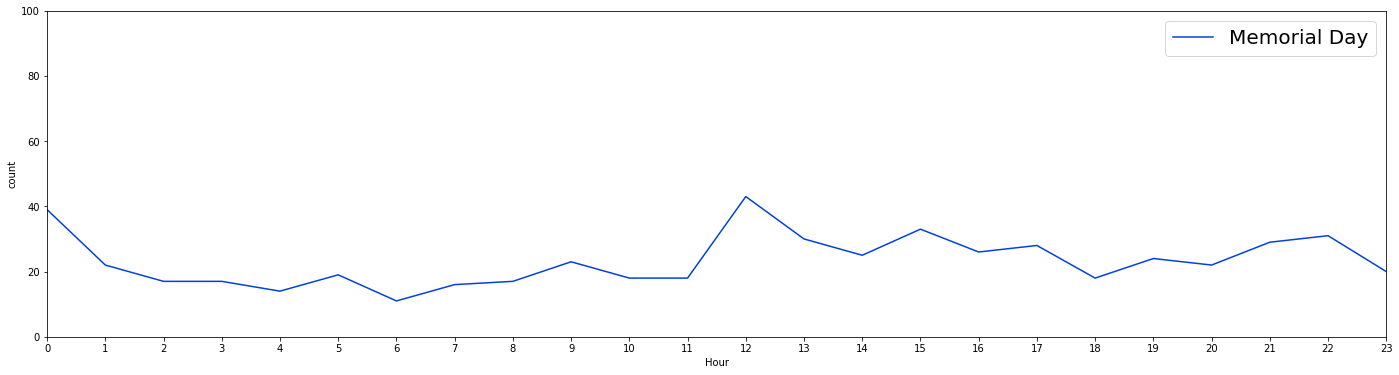

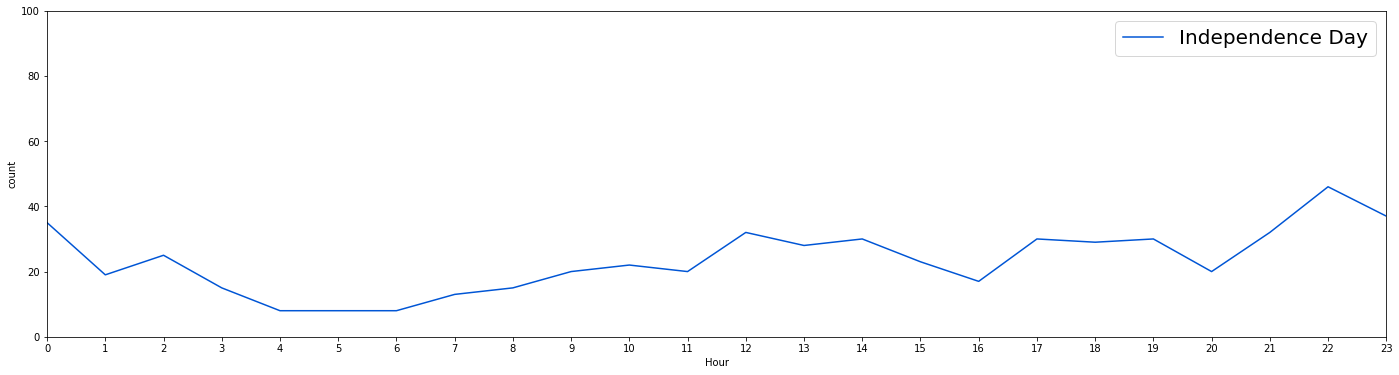

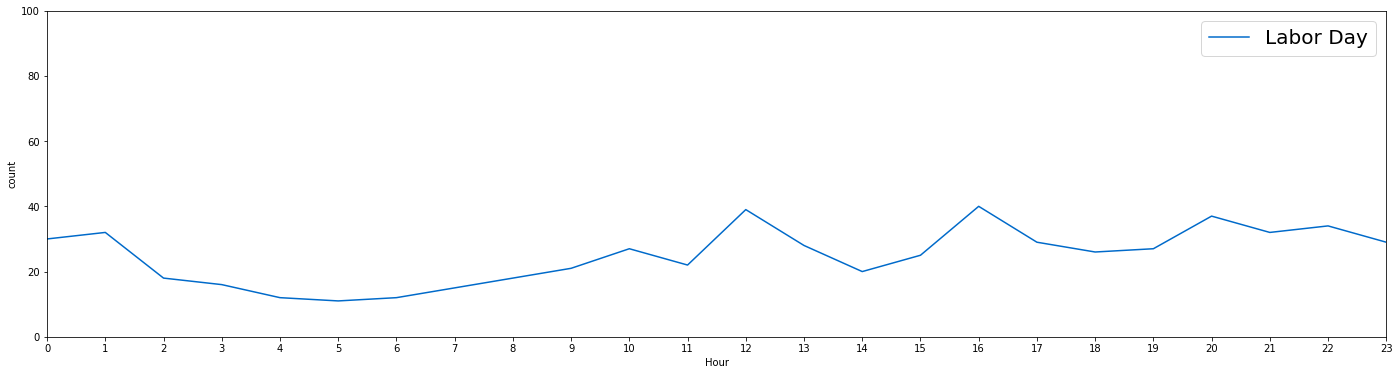

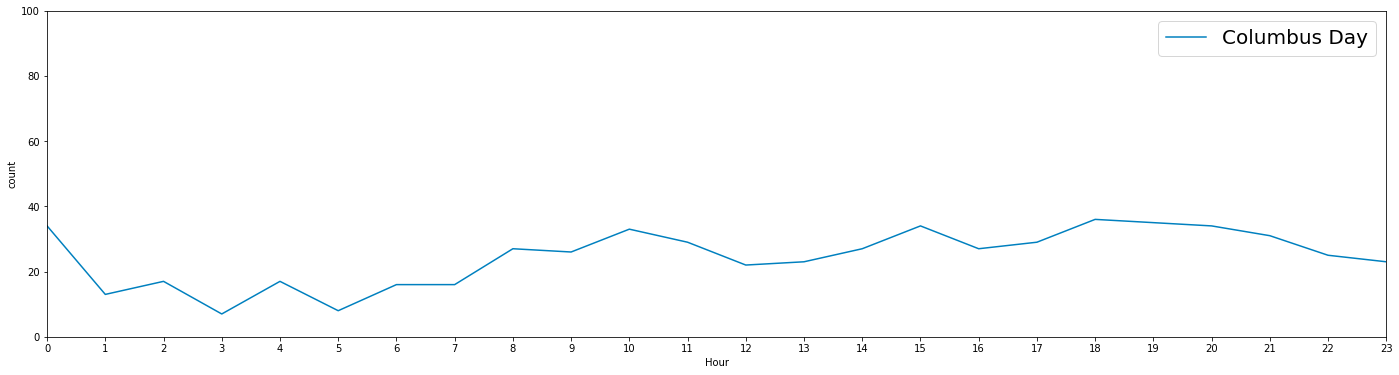

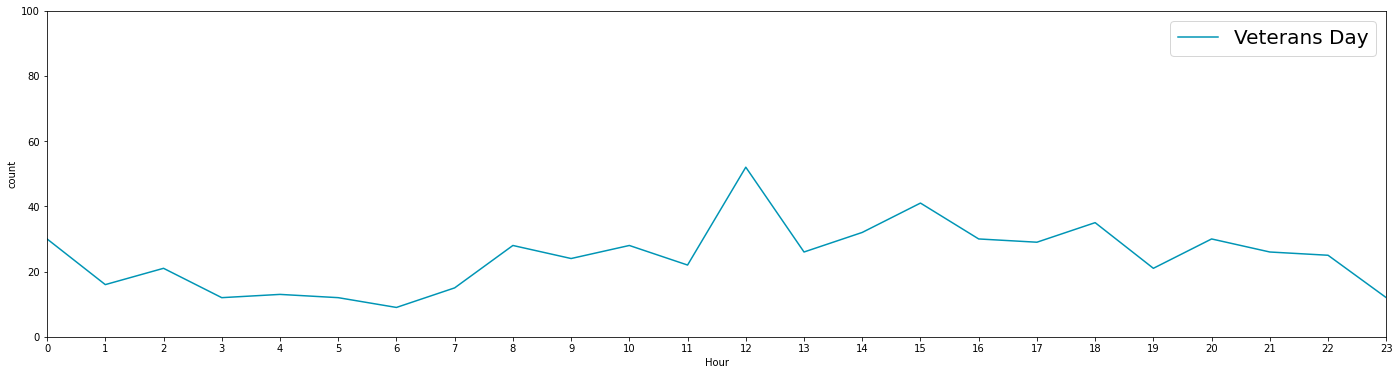

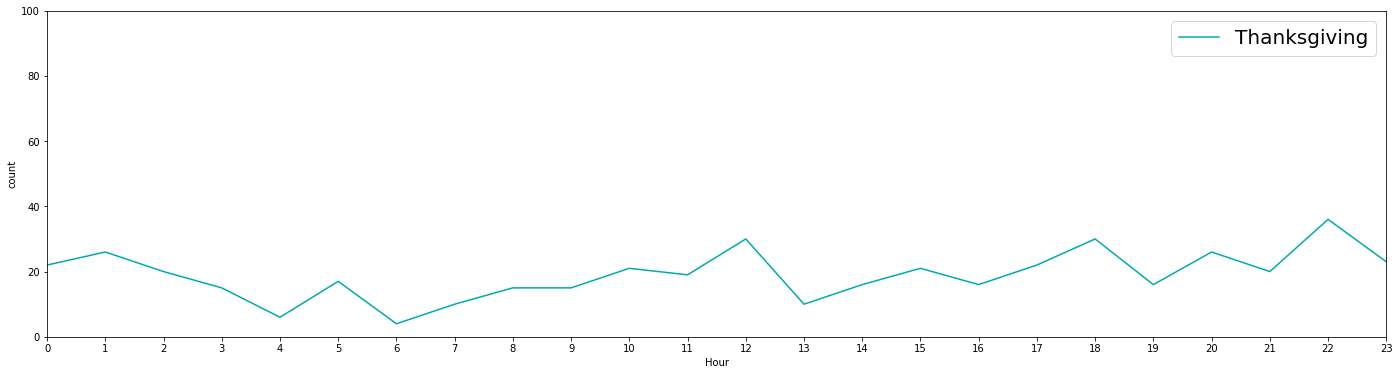

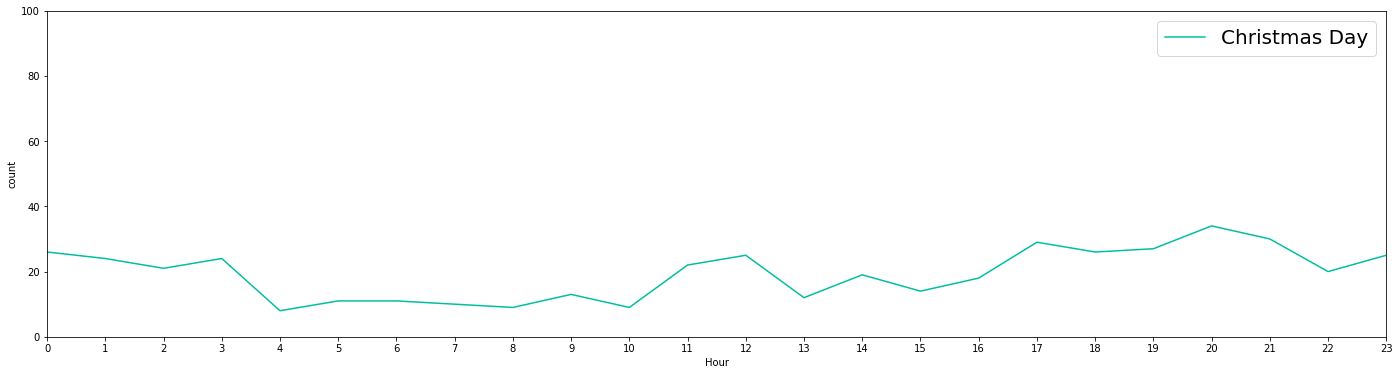

In [83]:
for y in range(len(holi_date)):
    cmap = plt.get_cmap("winter", len(d)+1)
    h = ["New Year's Day",'Martin Luther King Jr. Day',"Washington's Birthday",'Memorial Day','Independence Day','Labor Day','Columbus Day','Veterans Day','Thanksgiving','Christmas Day']
    data = df[df['Date']==holi_date[y]].groupby(['Hour'])['Incident'].agg(['count'])
    fig, ax = plt.subplots(figsize=(24,6), subplot_kw={'ylim': (0,100)})
    ax = sns.lineplot(data=data, x="Hour", y="count", color = cmap(y), label=h[y])
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    vals = range(len(df['Hour'].unique()))
    plt.xticks(vals)
    plt.show()

In [84]:
holi= df.loc[df['Date'].isin(holi_date)]
holi

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,ZIP Code,season
0,5619,2019-01-01,1,1,Tuesday,1,1,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",9622,SAN CARLOS,NaN,77013,Winter
1,17319,2019-01-01,1,1,Tuesday,1,1,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",0,EAST,FWY,77020,Winter
2,18119,2019-01-01,1,1,Tuesday,1,1,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT,77489,Winter
3,19019,2019-01-01,1,1,Tuesday,1,1,0,520,Weapon law violations,1,NaN,"Residence, Home (Includes Apartment)",1909,MELBOURNE,NaN,77026-0000,Winter
4,20519,2019-01-01,1,1,Tuesday,1,1,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR,77025,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214864,170236419,2019-12-25,12,25,Wednesday,52,359,23,13B,Simple assault,1,20G70,"Residence, Home (Includes Apartment)",12709,SUNSET DUNE,DR,77082,Winter
214865,170550619,2019-12-25,12,25,Wednesday,52,359,23,13A,Aggravated Assault,2,11H10,"Residence, Home (Includes Apartment)",0,2,ST,77011,Winter
214866,170652319,2019-12-25,12,25,Wednesday,52,359,23,23F,Theft from motor vehicle,1,20G80,"Parking Lot, Garage",14913,RICHMOND,AVE,77082,Winter
214867,171004219,2019-12-25,12,25,Wednesday,52,359,23,220,"Burglary, Breaking and Entering",1,18F20,"Residence, Home (Includes Apartment)",2801,WATERWALL,DR,77056,Winter


In [85]:
df10 = holi.groupby(['Date','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Date')
df10 = df10.sort_values(by='Date')
df10

,Date,Description,count
0,2019-01-01,Simple assault,116
14,2019-01-21,Simple assault,69
4,2019-02-18,Theft from motor vehicle,99
7,2019-05-27,Simple assault,89
6,2019-07-04,Simple assault,90
2,2019-09-02,Simple assault,104
5,2019-10-14,Theft from motor vehicle,93
1,2019-11-11,Theft from motor vehicle,108
13,2019-11-28,Simple assault,70
3,2019-12-25,Simple assault,102


In [86]:
df10['Holiday'] = ["New Year's Day",'Martin Luther King Jr. Day',"Washington's Birthday",'Memorial Day','Independence Day','Labor Day','Columbus Day','Veterans Day','Thanksgiving','Christmas Day']
column_move1 = df10['Holiday']
df10.drop(labels=['Holiday'], axis=1, inplace=True)
df10.insert(1,'Holiday', column_move1)
df10

,Date,Holiday,Description,count
0,2019-01-01,New Year's Day,Simple assault,116
14,2019-01-21,Martin Luther King Jr. Day,Simple assault,69
4,2019-02-18,Washington's Birthday,Theft from motor vehicle,99
7,2019-05-27,Memorial Day,Simple assault,89
6,2019-07-04,Independence Day,Simple assault,90
2,2019-09-02,Labor Day,Simple assault,104
5,2019-10-14,Columbus Day,Theft from motor vehicle,93
1,2019-11-11,Veterans Day,Theft from motor vehicle,108
13,2019-11-28,Thanksgiving,Simple assault,70
3,2019-12-25,Christmas Day,Simple assault,102


In [87]:
from datetime import date 
import holidays 
  
# Select country 
us_holidays = holidays.UnitedStates() 
  
# Print all the holidays in UnitedKingdom in year 2018 
for x in holidays.UnitedStates(years = 2019).items(): 
    print(x[1]) 

ModuleNotFoundError: No module named 'holidays'

In [88]:
[x[1] for x in holidays.UnitedStates(years = 2019).items()]

AttributeError: 'DatetimeIndex' object has no attribute 'UnitedStates'

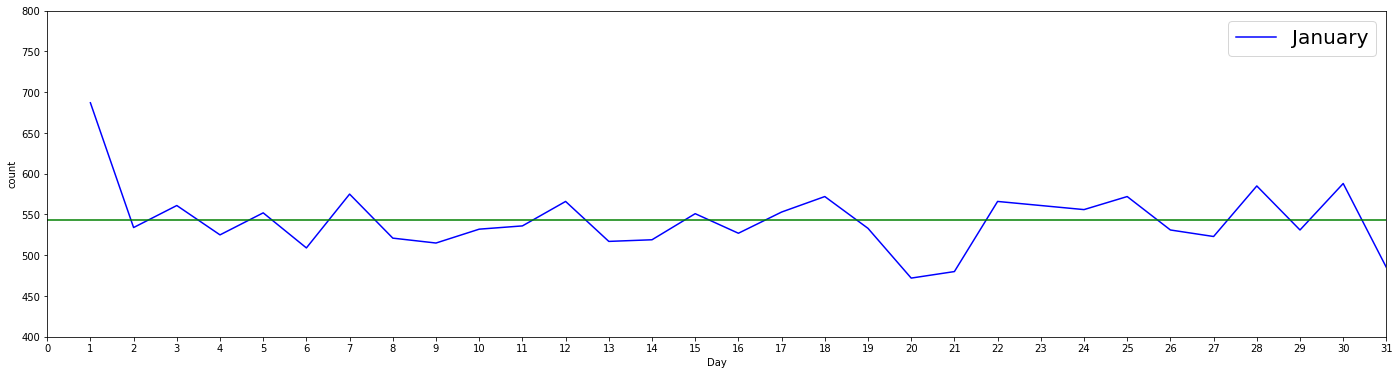

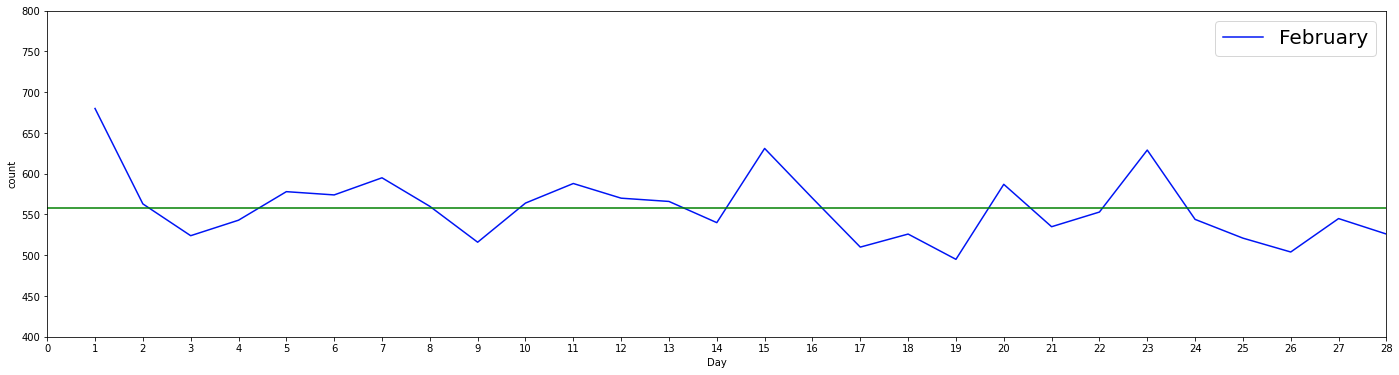

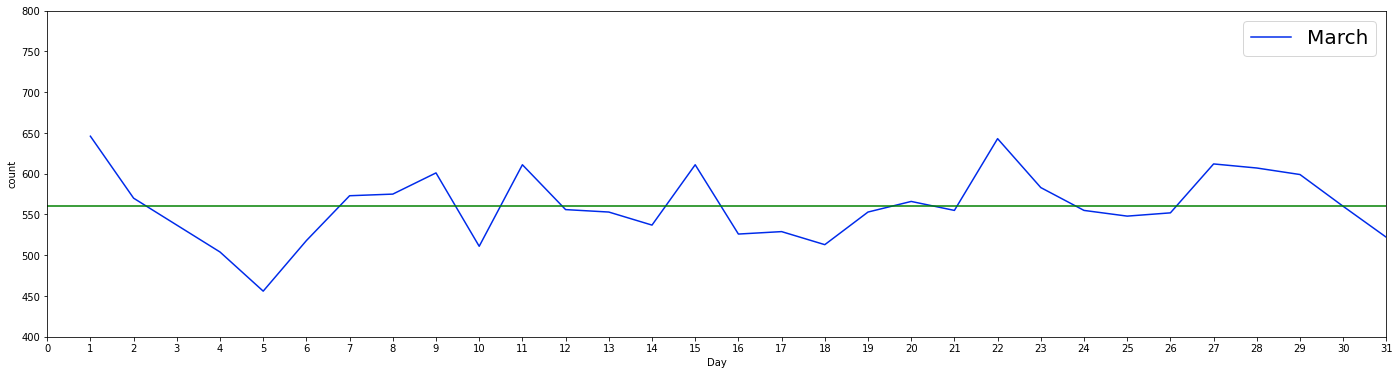

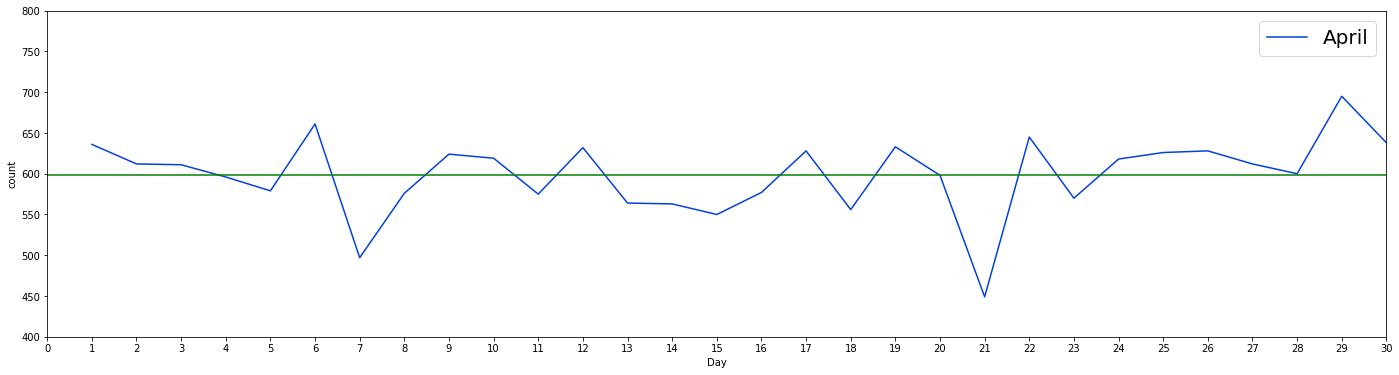

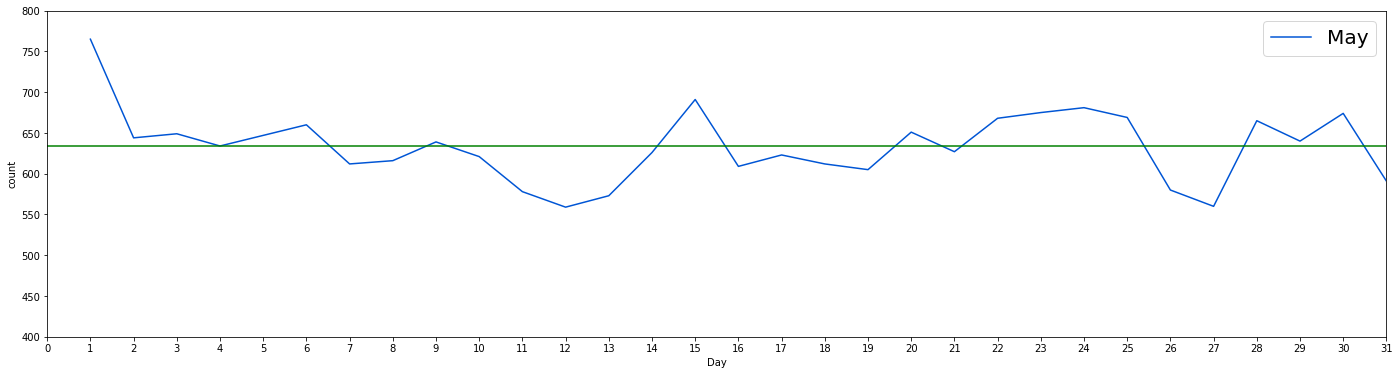

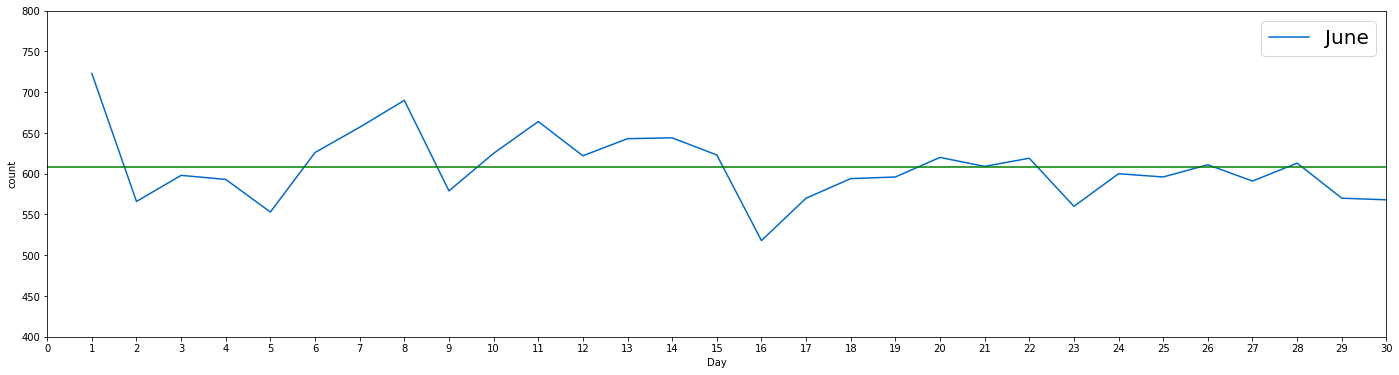

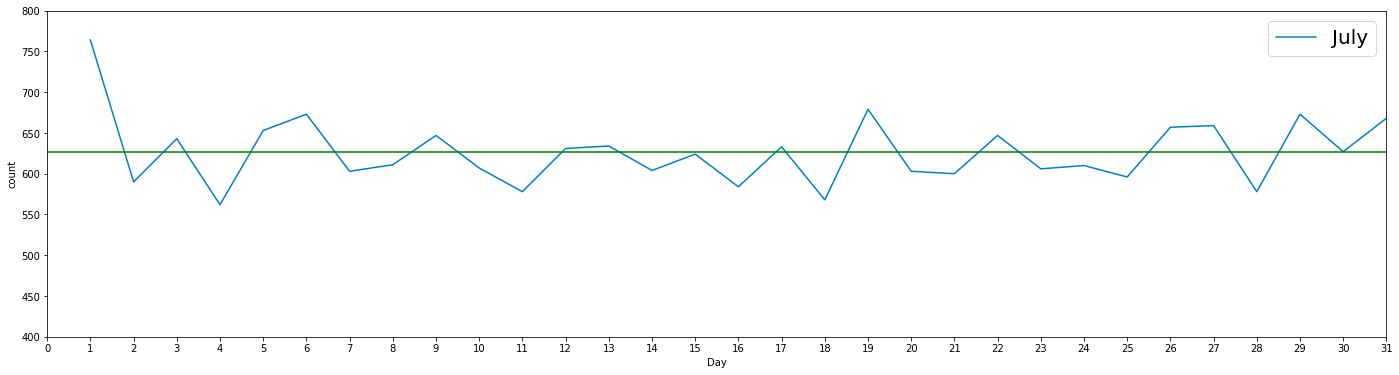

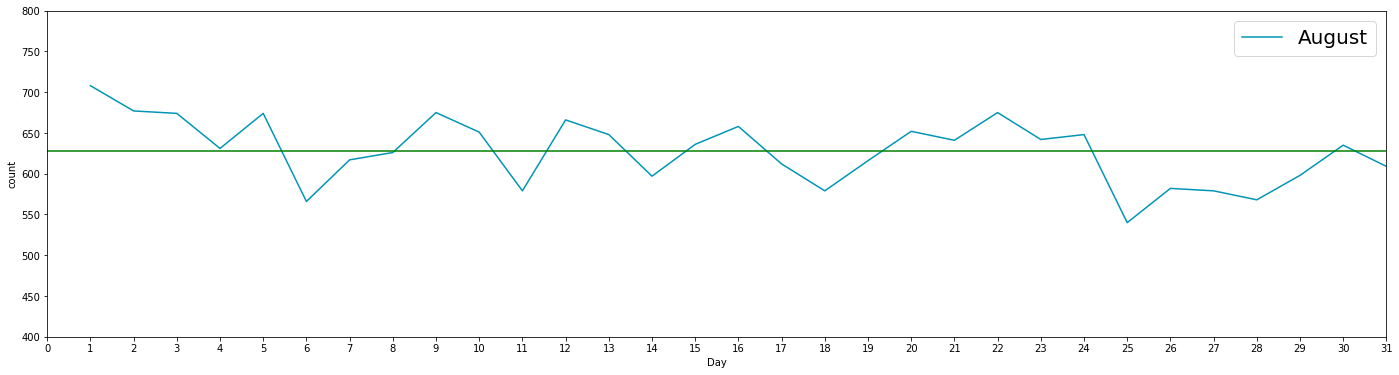

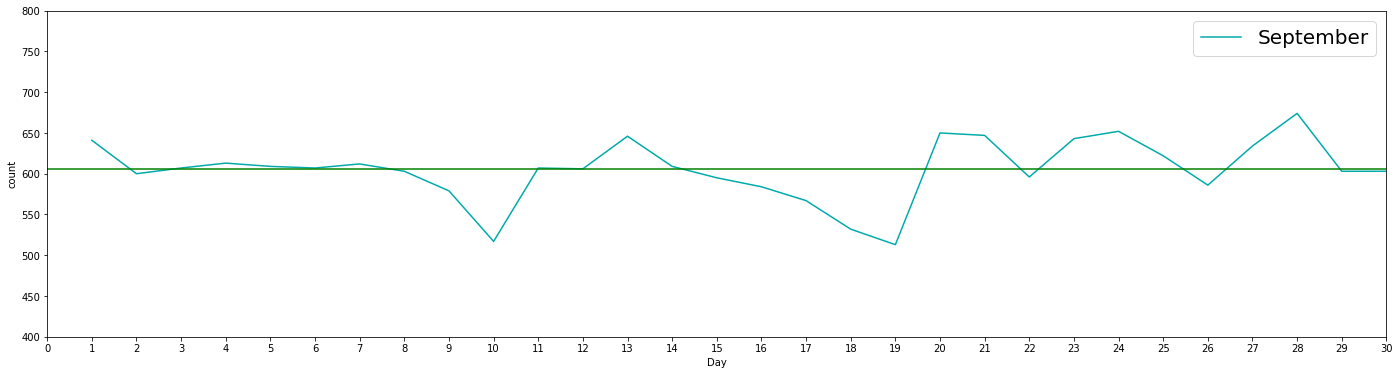

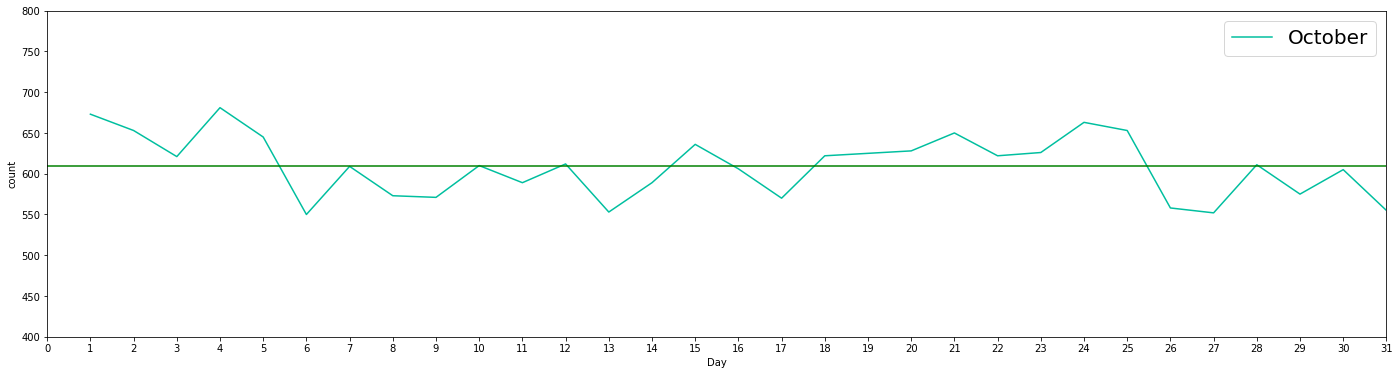

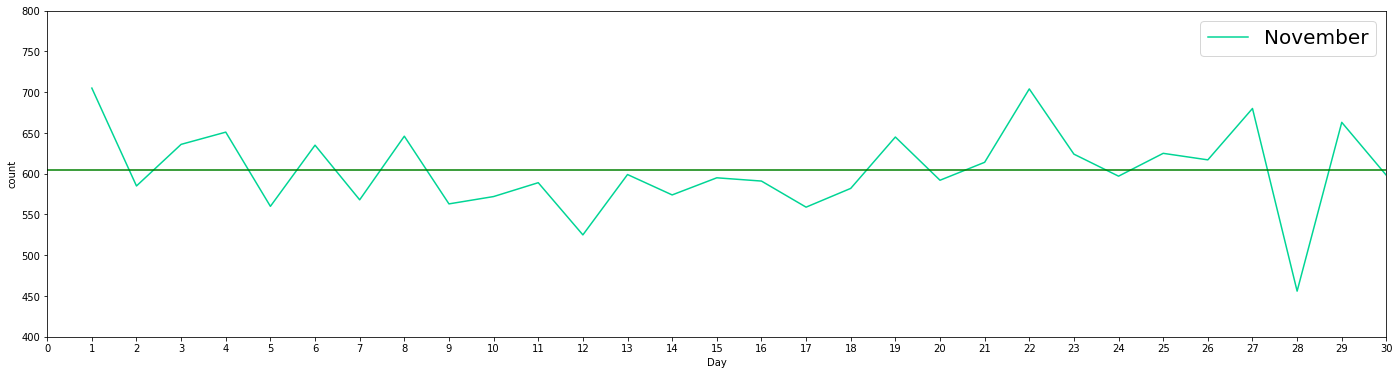

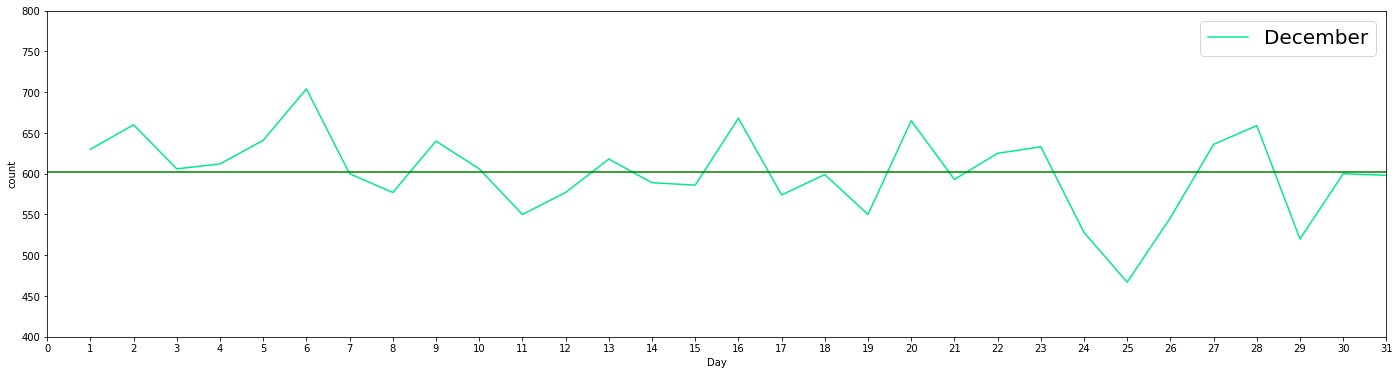

In [89]:
d = [x for x in df['Month'].value_counts().sort_index().index]
for y in range(len(d)):
    cmap = plt.get_cmap("winter", len(d)+1)
    #months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    months = [x for x in pd.to_datetime(df['Month'], format='%m').dt.month_name().unique()]
    data = df[df['Month']==d[y]].groupby(['Day'])['Day'].agg(['count'])
    fig, ax = plt.subplots(figsize=(24,6), subplot_kw={'ylim': (400,800)})
    ax = sns.lineplot(data=data, x="Day", y="count", color = cmap(y), label=months[y])
    mean = data['count'].mean()
    ax.axhline(mean, color='green')
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    vals = range(len(df[df['Month']==d[y]]['Day'].unique())+1)
    plt.xticks(vals)
    plt.show()

In [90]:
df[df['Day']==1].groupby(['Month'])['Month'].agg(['count'])

,count
Month,
1,687
2,680
3,646
4,636
5,765
6,723
7,764
8,708
9,641


In [91]:
## Most incidents by Hour
df4 = df.groupby(['Hour','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Hour')
df4 = df4.sort_values(by='Hour')
df4

,Hour,Description,count
21,0,Simple assault,1371
24,1,Simple assault,1272
36,2,Simple assault,1121
78,3,"Burglary, Breaking and Entering",811
99,4,"Burglary, Breaking and Entering",743
151,5,"Burglary, Breaking and Entering",578
132,6,"Burglary, Breaking and Entering",638
95,7,"Burglary, Breaking and Entering",750
59,8,All other larceny,901
75,9,Simple assault,825


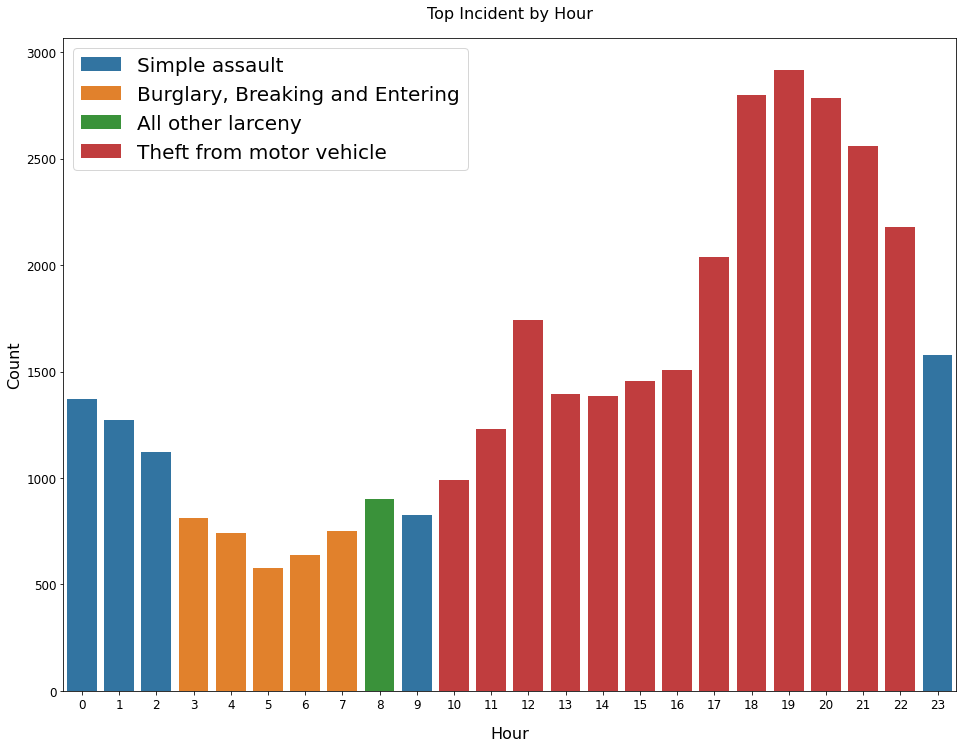

In [92]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="Hour", y="count", data=df4, hue='Description', dodge=False)
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Hour', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='best', prop={'size':20})
plt.show()

In [67]:
## Most Incidents By Street
df5 = df.groupby(['StreetName','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='StreetName')
df5.reset_index(inplace=True)
df5[:10]

,index,StreetName,Description,count
0,0,WESTHEIMER,Theft from motor vehicle,1435
1,2,KATY,Theft from motor vehicle,796
2,3,RICHMOND,Theft from motor vehicle,725
3,4,NORTH,Shoplifting,715
4,5,NORTHWEST,Theft from motor vehicle,636
5,6,SOUTHWEST,Theft from motor vehicle,555
6,7,GULF,Theft from motor vehicle,549
7,10,SAM HOUSTON,Theft from motor vehicle,468
8,12,LOOP,Theft from motor vehicle,409
9,13,SHEPHERD,Theft from motor vehicle,399


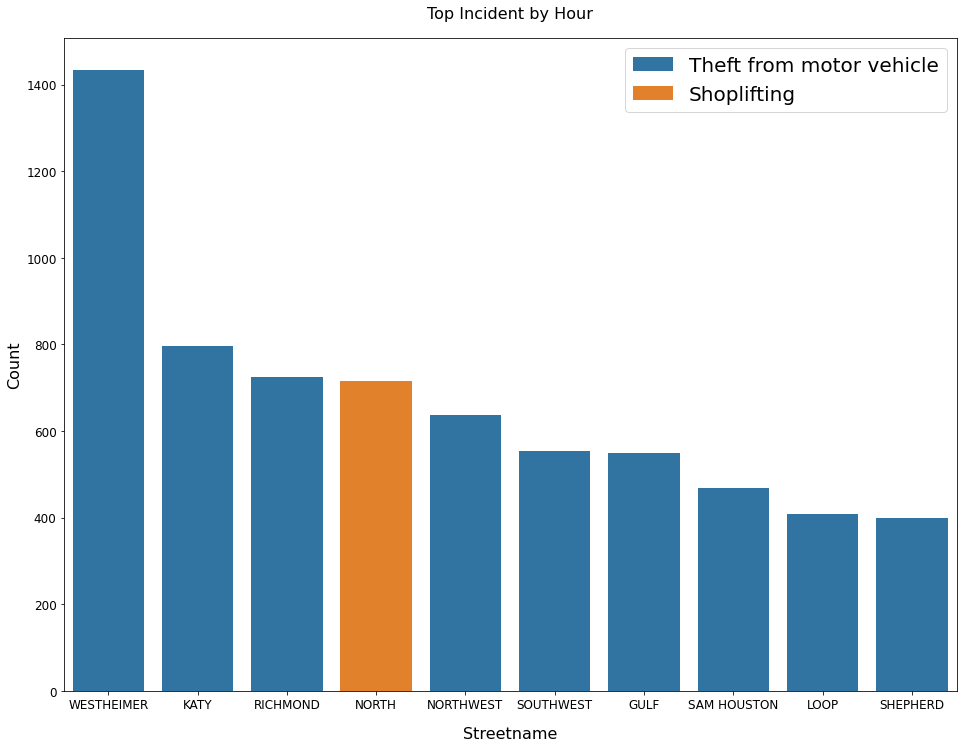

In [68]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="StreetName", y="count", data=df5[:10], hue='Description', dodge=False)
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Streetname', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='best', prop={'size':20})
plt.show()

In [69]:
w_df = df[df['StreetName']=='WESTHEIMER']
w_df['Block Range'].value_counts()

5085     377
5015     266
6425     190
5000     138
10801    129
        ... 
6513       1
6517       1
2427       1
8578       1
14287      1
Name: Block Range, Length: 934, dtype: int64

In [83]:
s_df = df.groupby(['StreetName'])['Block Range'].agg(['count']).sort_values(by='count', ascending=False)
s_df['percentage'] = s_df['count']  / s_df['count'].sum()
s_df

,count,percentage
StreetName,,
WESTHEIMER,6030,0.027606
GULF,2992,0.013698
NORTH,2940,0.013460
RICHMOND,2788,0.012764
MAIN,2692,0.012324
...,...,...
LEIGHTON,1,0.000005
LELDA,1,0.000005
LEMMA,1,0.000005


In [71]:
df6 = df.groupby(['Premise','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Premise')
df6.reset_index(inplace=True, drop=True)
df6

,Premise,Description,count
0,"Parking Lot, Garage",Theft from motor vehicle,17675
1,"Residence, Home (Includes Apartment)",Simple assault,16760
2,"Highway, Road, Street, Alley","Drug, narcotic violations",5296
3,"Department, Discount Store",Shoplifting,4322
4,"Other, Unknown",All other larceny,1754
5,Convenience Store,Shoplifting,1583
6,"Grocery, Supermarket",Shoplifting,1375
7,"Commercial, Office Building","Burglary, Breaking and Entering",1309
8,Restaurant,"Burglary, Breaking and Entering",1076
9,Speciality Store,Shoplifting,911


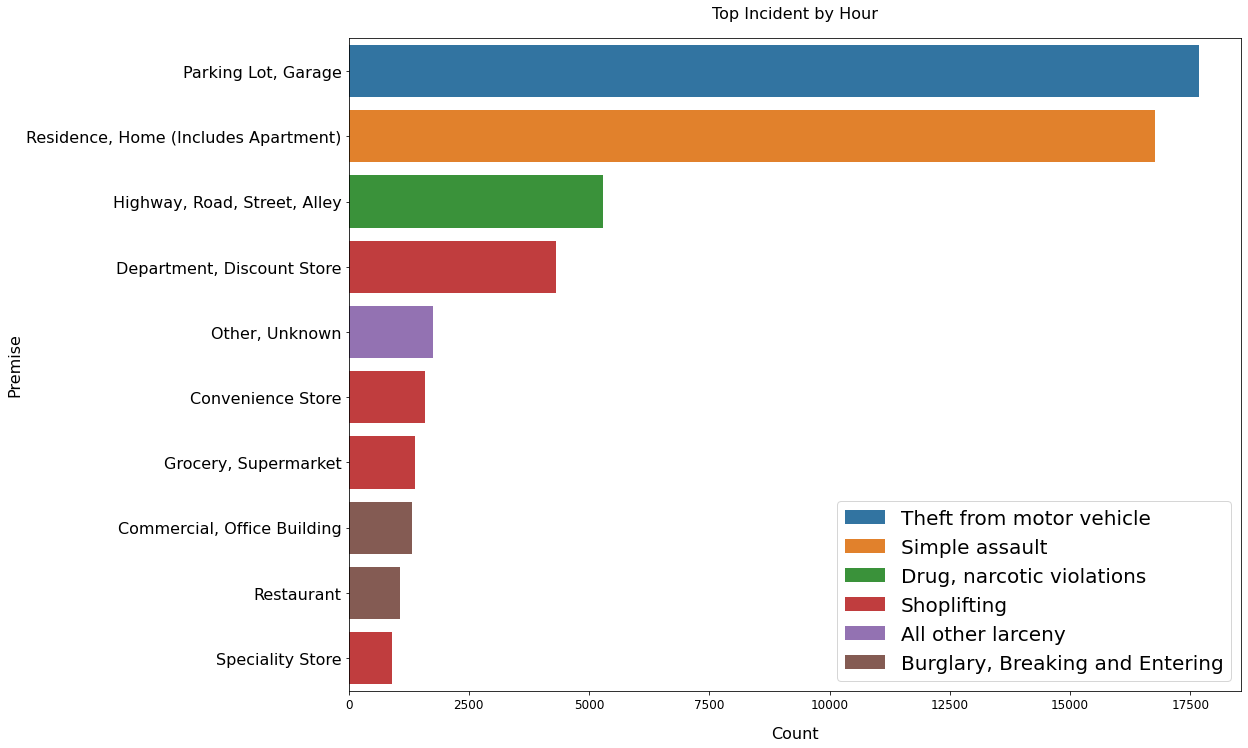

In [72]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x='count', y="Premise", data=df6[:10], hue='Description', dodge=False, orient = 'h')
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Premise', fontsize=16)
plt.xlabel('Count', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.legend(loc='best', prop={'size':20})
plt.show()

In [73]:
#Most Incidents by Day of Week
df7 = df.groupby(['week_of_year','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='week_of_year')
df7 = df7.sort_values(by='week_of_year')
df7

,week_of_year,Description,count
24,1,Theft from motor vehicle,648
51,2,Theft from motor vehicle,569
89,3,Theft from motor vehicle,499
82,4,Theft from motor vehicle,513
53,5,Theft from motor vehicle,561
45,6,Theft from motor vehicle,577
48,7,Theft from motor vehicle,572
29,8,Theft from motor vehicle,620
47,9,Theft from motor vehicle,575
61,10,Theft from motor vehicle,550


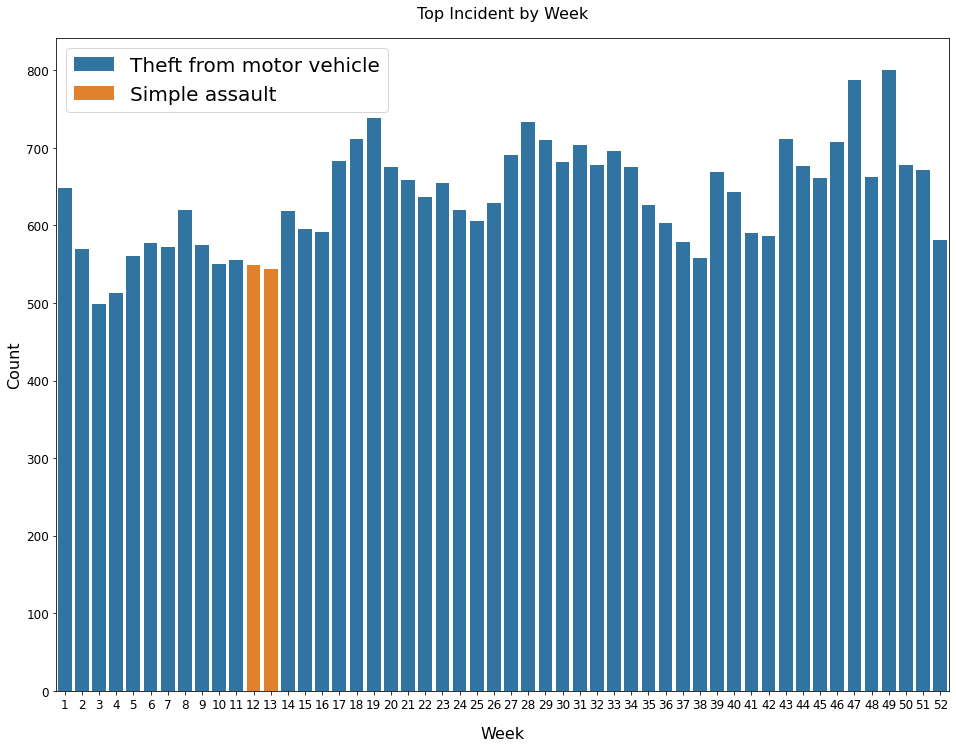

In [74]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="week_of_year", y="count", data=df7, hue='Description', dodge=False)
plt.title('Top Incident by Week', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='best', prop={'size':20})
plt.show()

In [75]:
#Most Incidents by day of year
d_count = df.groupby(['day_of_year'])['Incident'].agg(['count']).sort_values(by='day_of_year').reset_index()
d_count.head()

,day_of_year,count
0,1,687
1,2,534
2,3,561
3,4,525
4,5,552


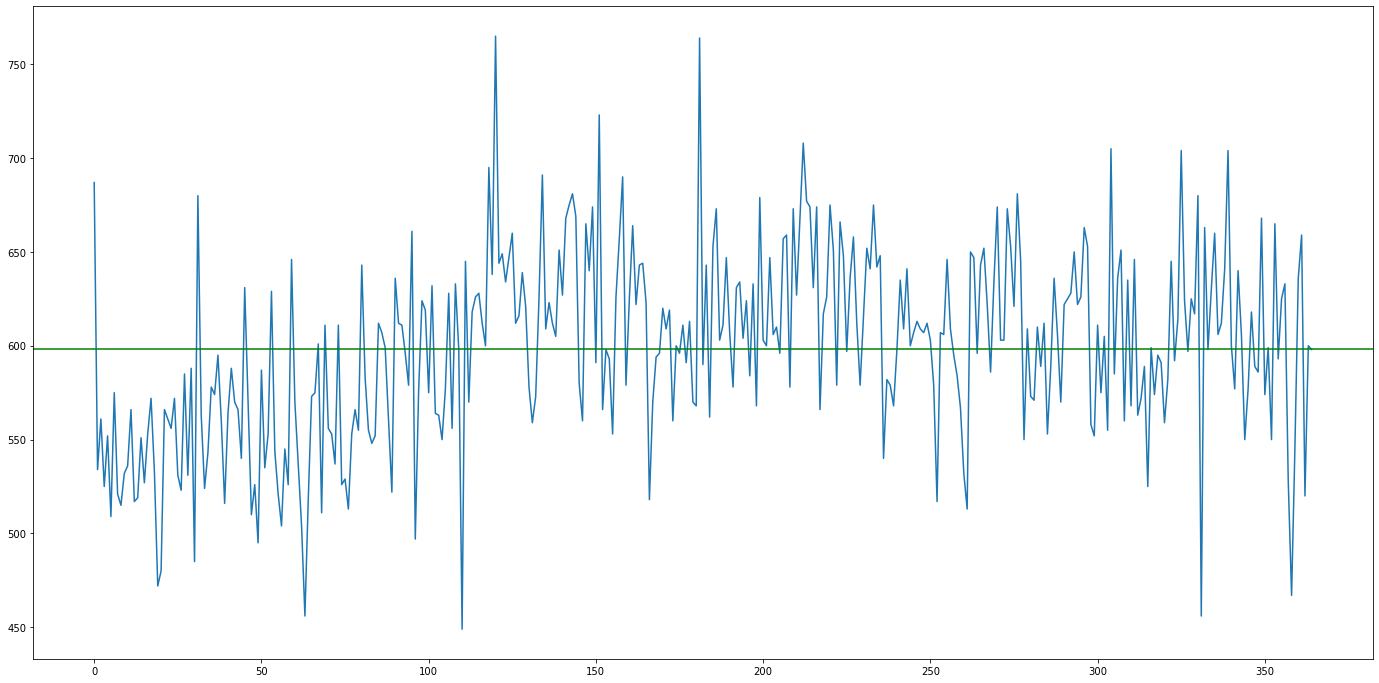

In [76]:
fig, ax = plt.subplots(figsize=(24,12))
ax=d_count['count'].plot()
mean = d_count['count'].mean()
ax.axhline(mean, color='green')
plt.show()

In [77]:
df8 = df.groupby(['day_of_year','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='day_of_year')
df8 = df8.sort_values(by='day_of_year')
df8.reset_index(drop=True,inplace=True)
df8

,day_of_year,Description,count
0,1,Simple assault,116
1,2,Theft from motor vehicle,88
2,3,Theft from motor vehicle,106
3,4,Theft from motor vehicle,86
4,5,Theft from motor vehicle,71
...,...,...,...
360,361,Theft from motor vehicle,96
361,362,Theft from motor vehicle,115
362,363,Simple assault,80
363,364,Theft from motor vehicle,80


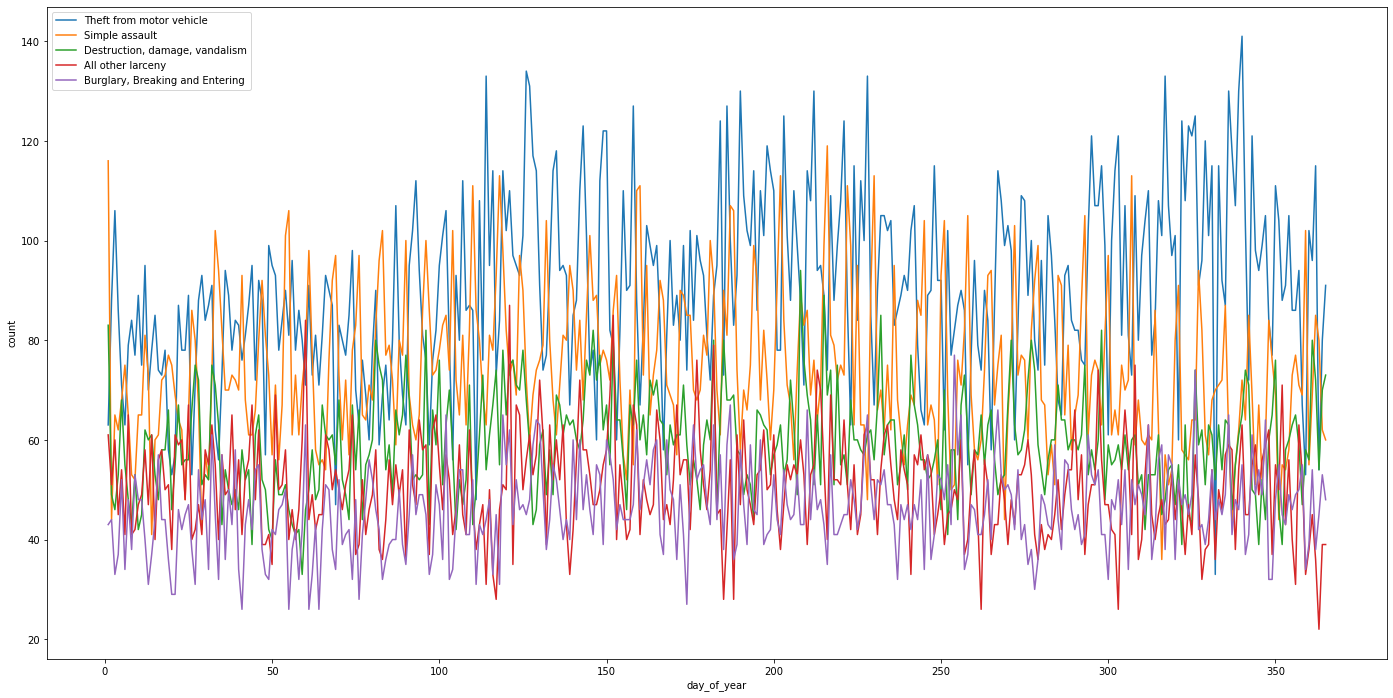

In [78]:
d = [x for x in df['Description'].value_counts()[:5].index]
fig, ax = plt.subplots(figsize=(24,12))
for y in d:
    data = df[df['Description']==y].groupby(['day_of_year'])['day_of_year'].agg(['count'])
    sns.lineplot(data=data, x="day_of_year", y="count", label = y)
plt.show()

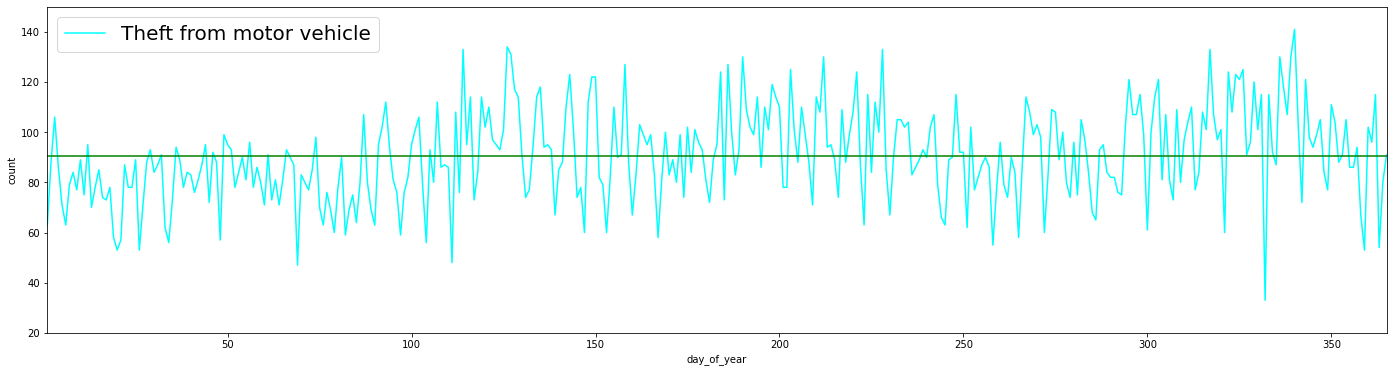

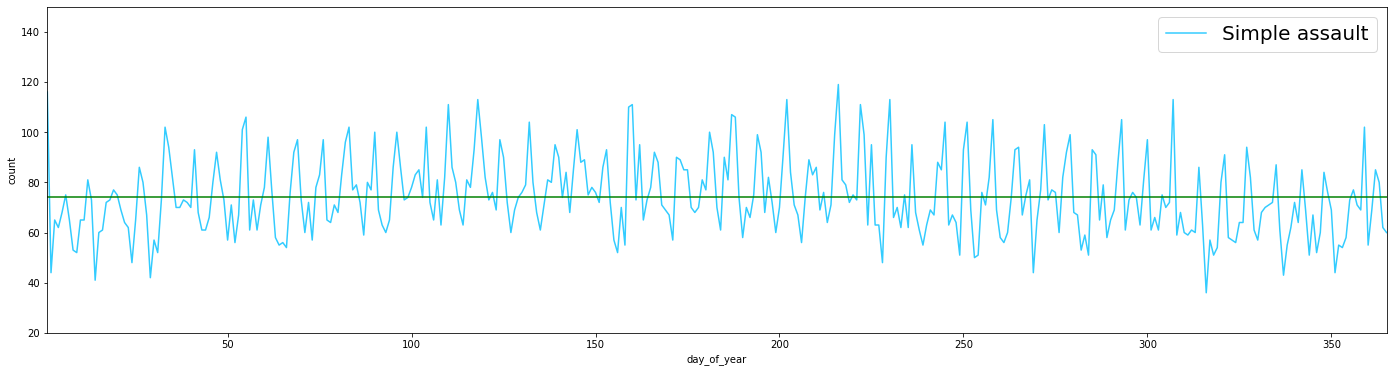

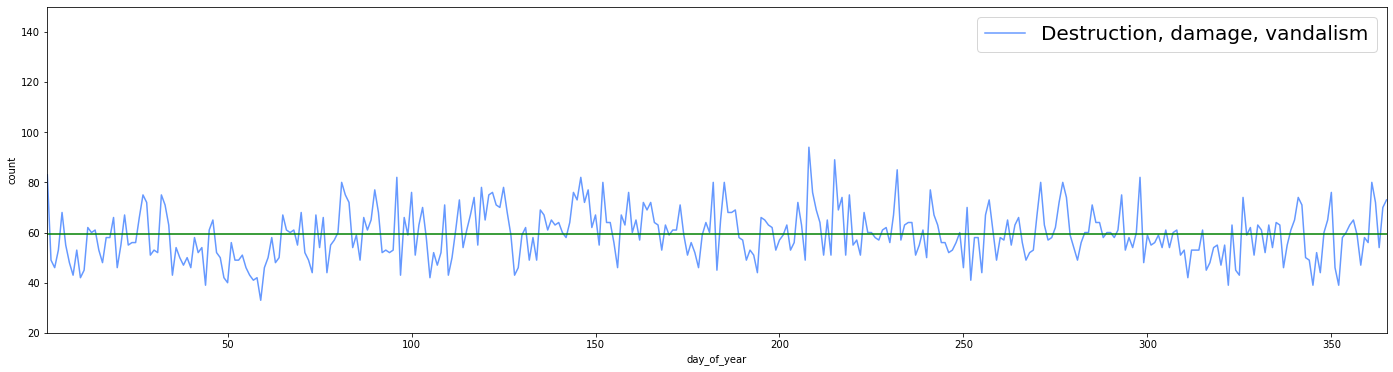

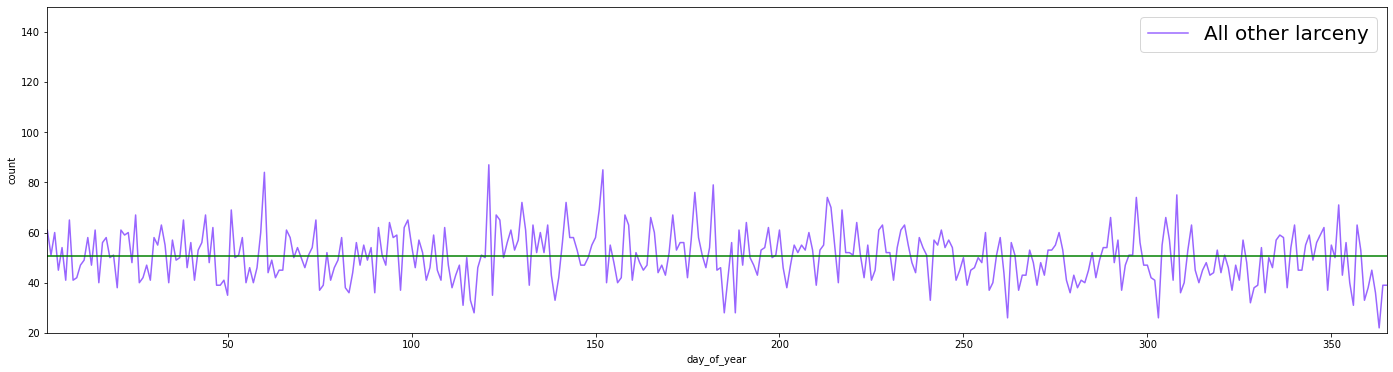

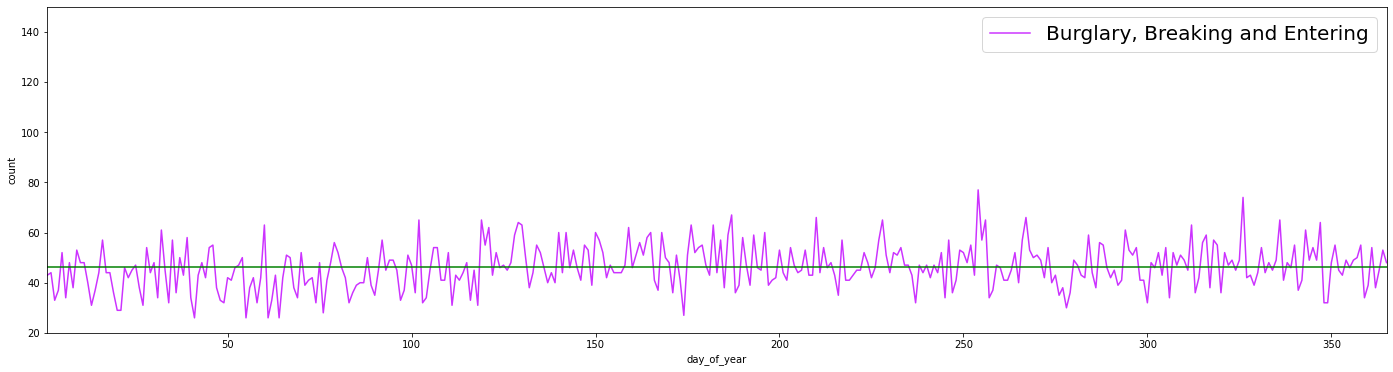

In [104]:
d = [x for x in df['Description'].value_counts()[:5].index]
for y in range(0,5):
    cmap = plt.get_cmap("cool", len(d)+1)
    data = df[df['Description']==d[y]].groupby(['day_of_year'])['day_of_year'].agg(['count'])
    fig, ax = plt.subplots(figsize=(24,6), subplot_kw={'ylim': (20,150)})
    ax = sns.lineplot(data=data, x="day_of_year", y="count", label = d[y], color = cmap(y))
    mean = data['count'].mean()
    ax.axhline(mean, color='green')
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    plt.show()

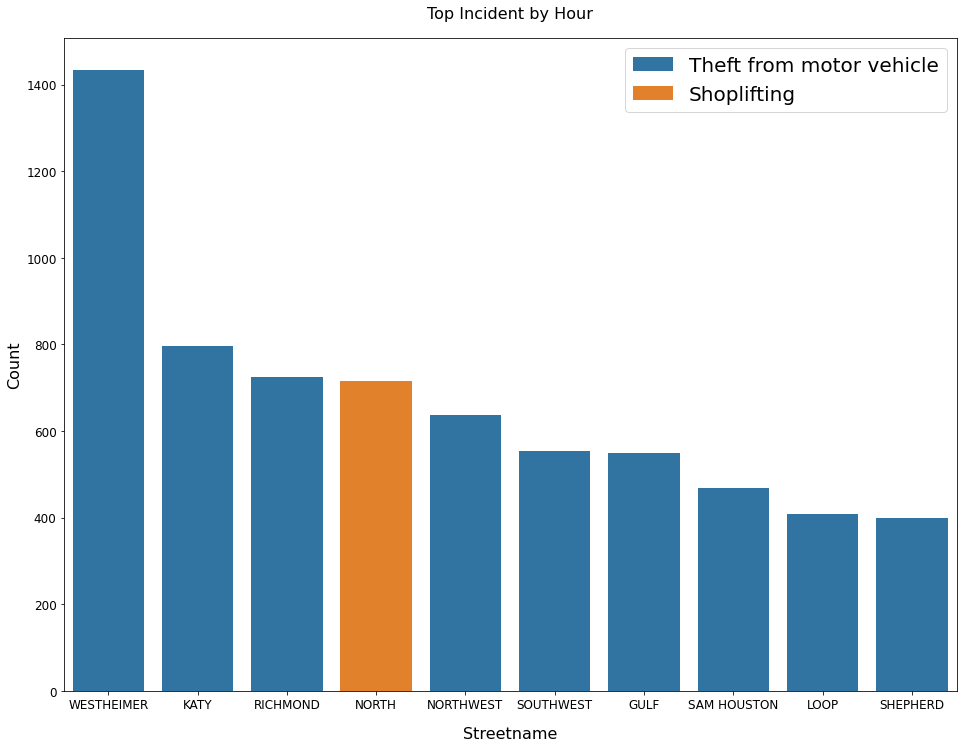

In [133]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="StreetName", y="count", data=df5[:10], hue='Description', dodge=False)
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Streetname', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(loc='best', prop={'size':20})
plt.show()

In [81]:
df[df['Premise']=='Residence, Home (Includes Apartment)']

,Incident,Date,Month,Day,Day_of_Week,week_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,ZIP Code
0,5619,2019-01-01,1,1,Tuesday,1,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",9622,SAN CARLOS,NaN,77013
2,18119,2019-01-01,1,1,Tuesday,1,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT,77489
3,19019,2019-01-01,1,1,Tuesday,1,0,520,Weapon law violations,1,NaN,"Residence, Home (Includes Apartment)",1909,MELBOURNE,NaN,77026-0000
4,20519,2019-01-01,1,1,Tuesday,1,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR,77025
5,20519,2019-01-01,1,1,Tuesday,1,0,23H,All other larceny,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR,77025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218420,172623419,2019-12-31,12,31,Tuesday,1,23,13C,Intimidation,1,22B30,"Residence, Home (Includes Apartment)",294,ELDON,DR,77060
218421,172623419,2019-12-31,12,31,Tuesday,1,23,520,Weapon law violations,1,22B30,"Residence, Home (Includes Apartment)",294,ELDON,DR,77060
218422,172626019,2019-12-31,12,31,Tuesday,1,23,13B,Simple assault,1,14D10,"Residence, Home (Includes Apartment)",3809,SOUTHLAWN,ST,77021
218423,172626019,2019-12-31,12,31,Tuesday,1,23,13A,Aggravated Assault,1,14D10,"Residence, Home (Includes Apartment)",3809,SOUTHLAWN,ST,77021


In [ ]:
may = df[df['Month']==5]
may.head()

In [ ]:
april = df[df['Month']==4]
april.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
may.groupby(['Day'])['Day'].agg(['count']).sort_values(by='Day').plot(kind='bar', ax=ax, label = 'May')
april.groupby(['Day'])['Day'].agg(['count']).sort_values(by='Day').plot(kind='line', ax=ax, color='orange', label= 'April', linewidth=5.0)
ax.legend(labels=['April','May'])
ax.set_title("May & April")
plt.show()

In [ ]:
am = df[(df['Month']==5) | (df['Month']==4)]
am.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
may['Description'].value_counts()[:5].plot(kind='bar')
april['Description'].value_counts()[:5].plot(kind='bar')

In [ ]:
m =may['Description'].value_counts()[:5]
a =april['Description'].value_counts()[:5]

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
bar_width = 0.4
x = np.arange(len(may['Description'].value_counts()[:5].index))
y = np.arange(len(april['Description'].value_counts()[:5].index))
ax1 = plt.bar(x, m.values, color='lightblue', edgecolor='white', width=bar_width, label = 'May')
ax2= plt.bar(y + bar_width, a.values, color='lightgreen', edgecolor='white', width=bar_width, label = 'April')
ax.legend(['May','April'])
ax.set_xticks(y + bar_width / 2)
ax.set_xticklabels(may['Description'].value_counts()[:5].index)
plt.show()

In [ ]:
april['Description'].value_counts()[:5]

##Weekend or Weekday

In [ ]:
df['Type_of_Day']=['Weekend' if x == "Saturday" or x =='Sunday' or x=='Friday' and y >=16 else 'Weekday' for (x,y) in zip(df['Day_of_Week'],df['Hour'])]

In [ ]:
# def weekdays(df):
#   if (df['Day_of_Week'] == 'Saturday') | (df['Day_of_Week'] == 'Sunday'):
#     return 'Weekend'
#   elif (df['Day_of_Week'] == 'Friday') and (df['Hour'] >= 16):
#     return 'Weekend'
#   else:
#     return "Weekday"
# df['Type_of_Day'] = df.apply(weekdays, axis=1)

In [ ]:
# Type_of_Day = []
# for row in df['Day_of_Week']:
#   if row == 'Saturday':
#     Type_of_Day.append('Weekend')
#   elif row == 'Sunday':
#     Type_of_Day.append('Weekend')
#   else:
#     Type_of_Day.append('Weekday')
# df['Types_of_Day'] = Type_of_Day

In [ ]:
# df['Type_of_Day'] = np.where((df['Day_of_Week']=='Saturday') | (df['Day_of_Week']=='Sunday') | ((df['Day_of_Week'] == 'Friday') & (df['Hour'] >= 16)), 'Weekend', 'Weekday')

In [ ]:
# df.loc[(df['Day_of_Week'] == 'Saturday') & (df['Day_of_Week'] == 'Sunday'), 'Type_of_Day'] = 'Weekend'  
# df.loc[(df['Day_of_Week'] != 'Saturday') | (df['Day_of_Week'] != 'Sunday'), 'Type_of_Day'] = 'Weekday'
# df.loc[(df['Day_of_Week'] == 'Friday') & ((df['Hour'] >= 16)), 'Type_of_Day'] = 'Weekend'

In [ ]:
# df['Type_of_Day'] = df.Day_of_Week.apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [ ]:
# df['Type_of_Day'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if (x == 'Saturday' or x == 'Sunday') else 'Weekday')

In [ ]:
# df['Type_of_Day'] = df['Day_of_Week'].map({'Monday':'Weekday', 'Tuesday':'Weekday','Wednesday':'Weekday','Thursday':'Weekday','Friday':'Weekday','Saturday':'Weekend','Sunday':'Weekend'})

In [ ]:
df[(df['Day_of_Week']=='Friday')].head()

In [ ]:
df.drop('Types', axis=1, inplace=True)

In [ ]:
df[(df['Day_of_Week']=='Sunday')].head()

In [ ]:
df[(df['Hour'] >= 16) & (df['Day_of_Week'] == 'Friday')].head()

In [ ]:
df.head()

In [ ]:
column_move5 = df['Type_of_Day']
df.drop(labels=['Type_of_Day'], axis=1, inplace=True)
df.insert(5,'Type_of_Day', column_move5)

In [ ]:
df.head()

In [ ]:
df['Type_of_Day'].value_counts()

In [ ]:
dayname_count  = df['Type_of_Day'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(dayname_count.index, dayname_count.values, alpha=0.8)
plt.title('Reports by Weekday and Weekend Total')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
labels = ['Weekday','Weekend']
sizes = [df['Type_of_Day'].value_counts()]
explode=(0.1,0)
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 16})
plt.show()

In [ ]:
labels = ['Weekday','Weekend']
sizes = [df['Type_of_Day'].value_counts()]
colors = ['#ff9999','#66b3ff']
textprops = {"fontsize":20}

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85,
            startangle=90, labeldistance=1.05, textprops =textprops)
plt.axis('equal')
plt.gca().add_artist(my_circle)
            
plt.show()


In [ ]:
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sizes = [df['Day_of_Week'].value_counts().sort_index()]
textprops = {"fontsize":20}

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85,
            startangle=90, labeldistance=1.05, textprops =textprops)
plt.axis('equal')
plt.gca().add_artist(my_circle)
            
plt.show()

In [ ]:
df['Day_of_Week'].value_counts(normalize=True).sort_index() *100

In [ ]:
df[df['Type_of_Day']=='Weekday']['Description'].value_counts(normalize=True)[:10]


In [ ]:
weekend_df =df[(df['Type_of_Day']=='Weekend')]
weekend_df.head()

In [ ]:
df[df['Type_of_Day']=='Weekend']['Description'].value_counts(normalize=True)[:10]

In [ ]:
weekend_df[weekend_df['Description']=='Simple assault']['StreetName'].value_counts()[:10]

In [ ]:
weekday_df =df[(df['Type_of_Day']=='Weekday')]
weekday_df.head()

In [ ]:
df[df['Type_of_Day']=='Weekday']['Description'].value_counts()[:10]

In [ ]:
weekday_df[weekday_df['Description']=='Theft from motor vehicle']['StreetName'].value_counts()[:10]

##Biggest offense by day of week

In [ ]:
dayoffense_count  = df[df['Day_of_Week']=='Friday']['Description'].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.barplot(dayoffense_count.values, dayoffense_count.index, alpha=0.8)
plt.title('Every Friday of 2019')
plt.ylabel('Friday Offenses', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

##What Happened in May?

In [ ]:
may_df = df[(df['Month']==5)]
may_df.head()

In [ ]:
may_df['Date'].value_counts()

In [ ]:
df5 = may_df.groupby(['Date','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Date')
df5.sort_values('Date').reset_index(drop=True)

##Street Name

In [ ]:
df['StreetName'].value_counts()

In [ ]:
df[df['StreetName']=='WESTHEIMER']['Description'].value_counts()

##Description

In [ ]:
df['Description'].value_counts()[:10]

In [ ]:
df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts()[:10]

##Theft from Motor Vehicle in Parking Lot, Garage is most common.

In [ ]:
vehicle_df = df[(df['Description'] == 'Theft from motor vehicle') & (df['Premise'] == 'Parking Lot, Garage')]
vehicle_df.head()

In [ ]:
vehicle_df['StreetName'].value_counts()[:10]

In [ ]:
vehicle_df[vehicle_df['StreetName']=='WESTHEIMER']['ZIP Code'].value_counts()

In [ ]:
zip_count  = vehicle_df[vehicle_df['StreetName']=='WESTHEIMER']['ZIP Code'].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.barplot(zip_count.index, zip_count.values, alpha=0.8, order=zip_count.index)
plt.title('Top 10 Zipcode\'s for \nTheft from Motor Vehicle')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
vehicle_df[vehicle_df['StreetName']=='WESTHEIMER']['Block Range'].value_counts()

In [ ]:
zip_count  = vehicle_df[vehicle_df['StreetName']=='WESTHEIMER']['Block Range'].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.barplot(zip_count.index, zip_count.values, alpha=0.8, order=zip_count.index)
plt.title('Top 10 Zipcode\'s for \nTheft from Motor Vehicle')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
vehicle_df[vehicle_df['StreetName']=='WESTHEIMER']['Month'].value_counts()[:10]

# Popular spots for crime

In [ ]:
df['ZIP Code'].value_counts()[:10]

In [ ]:
filter_list = df['ZIP Code'].value_counts()[:10].index
zip_df = df[df['ZIP Code'].isin(filter_list)]
zip_df.head()

In [ ]:
zip_df['Description'].value_counts()

In [ ]:
zip_df[zip_df['Description'] == 'Theft from motor vehicle']['Premise'].value_counts()

In [ ]:
zip_df[(zip_df['Description'] == 'Theft from motor vehicle') & (df['Premise'] == 'Parking Lot, Garage')]

# Dates with Highest Incidents

In [50]:
def count_per(data):
    Total = df['Day'].value_counts().sort_index()
    Percentage = df['Day'].value_counts(normalize=True).sort_index()
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
day_count = count_per(df)

In [51]:
day_count

,Total,Percent
1,8258,0.037807
2,7254,0.033210
3,7267,0.033270
4,7145,0.032711
5,7147,0.032720
6,7283,0.033343
7,7118,0.032587
8,7174,0.032844
9,7149,0.032729
10,7035,0.032207


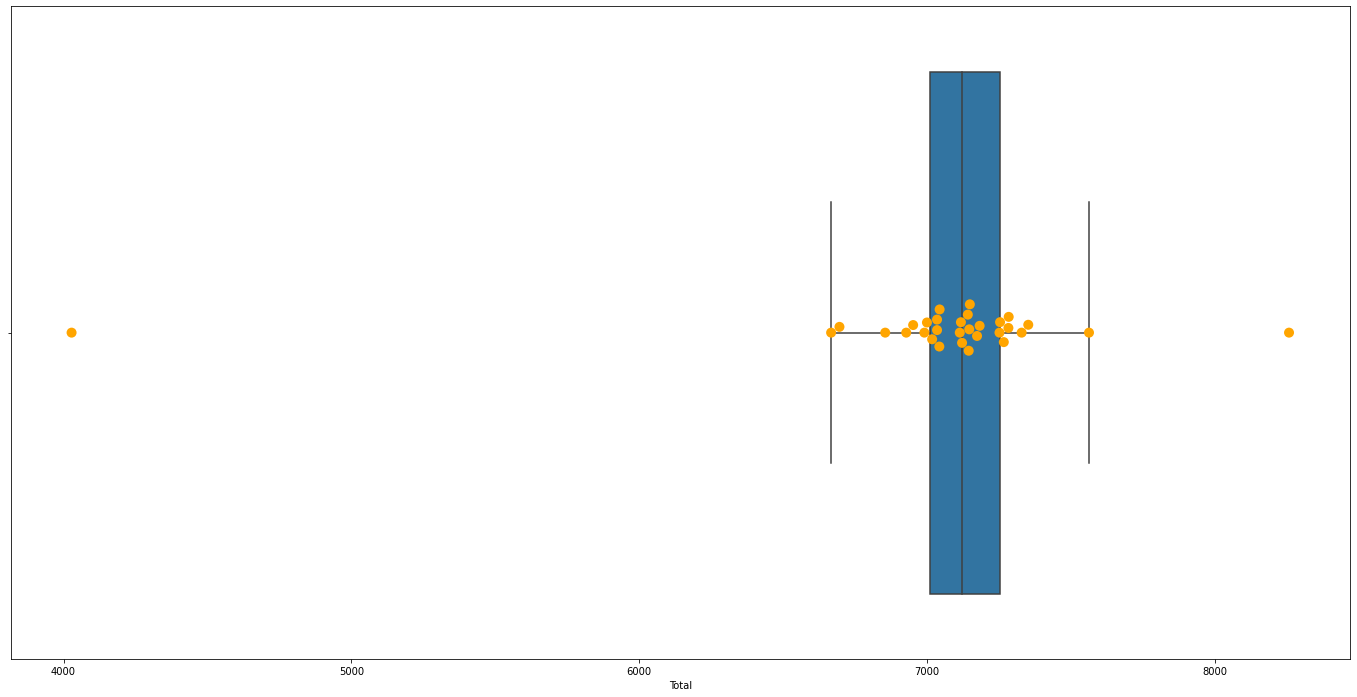

In [52]:
plt.figure(figsize=(24,12))
sns.boxplot(x='Total', data=day_count, showfliers=False)
sns.swarmplot(x='Total', data=day_count, color="orange", s=10)
plt.show()

In [72]:
daycount = df.groupby(['Day'])['Incident'].agg(['count']).sort_values(by='Day').reset_index()

In [76]:
q1 = daycount['count'].quantile(0.25)
q2 = daycount['count'].quantile(0.50)
q3 = daycount['count'].quantile(0.75)
mean = daycount['count'].mean()

In [77]:
def color_negative_red(value):

  if value < q1:
    color = 'red'
  elif value > q3:
    color = 'green'
  elif value == q2:
    color = 'blue'    
  else:
    color = 'black'

  return 'color: %s' % color

In [78]:
daycount.style.applymap(color_negative_red, subset=['count'])

,Day,count
0,1,8258
1,2,7254
2,3,7267
3,4,7145
4,5,7147
5,6,7283
6,7,7118
7,8,7174
8,9,7149
9,10,7035


# Social Security Checks

In [55]:
w = pd.date_range('2019-01-01','2019-12-31', freq='D')
wednesday = w[(w.dayofweek == 2) & (w.day>=12) & (w.day<=18)]
wed3 = [x.strftime("%Y-%m-%d") for x in wednesday]
wed3

['2019-01-16',
 '2019-02-13',
 '2019-03-13',
 '2019-04-17',
 '2019-05-15',
 '2019-06-12',
 '2019-07-17',
 '2019-08-14',
 '2019-09-18',
 '2019-10-16',
 '2019-11-13',
 '2019-12-18']

In [52]:
df[df['Date']=='2020-01-15']['Description'].value_counts()[:1]

Series([], Name: Description, dtype: int64)

In [56]:
for x in wed3:
    wed_3 = df[df['Date']==x]['Description'].value_counts()[:1]
    print(wed_3)

Theft from motor vehicle    74
Name: Description, dtype: int64
Theft from motor vehicle    95
Name: Description, dtype: int64
Theft from motor vehicle    77
Name: Description, dtype: int64
Theft from motor vehicle    112
Name: Description, dtype: int64
Theft from motor vehicle    118
Name: Description, dtype: int64
Theft from motor vehicle    99
Name: Description, dtype: int64
Theft from motor vehicle    119
Name: Description, dtype: int64
Theft from motor vehicle    112
Name: Description, dtype: int64
Theft from motor vehicle    79
Name: Description, dtype: int64
Theft from motor vehicle    84
Name: Description, dtype: int64
Theft from motor vehicle    133
Name: Description, dtype: int64
Theft from motor vehicle    88
Name: Description, dtype: int64


In [112]:
w_df = df[df['Day_of_Week']=='Wednesday']
w_df

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code,season
687,476219,2019-01-02,1,2,Wednesday,1,2,0,13C,Intimidation,1,8C60,Convenience Store,5946,MOUNT HOUSTON,RD,E,77050,Winter
688,477619,2019-01-02,1,2,Wednesday,1,2,0,35A,"Drug, narcotic violations",1,10H60,"Residence, Home (Includes Apartment)",5121,GRANTWOOD,ST,NaN,77004,Winter
689,478419,2019-01-02,1,2,Wednesday,1,2,0,290,"Destruction, damage, vandalism",1,14D20,"Parking Lot, Garage",4215,BARBERRY,DR,NaN,77051,Winter
690,479619,2019-01-02,1,2,Wednesday,1,2,0,23C,Shoplifting,1,11H10,"Department, Discount Store",2391,WAYSIDE,DR,S,77023,Winter
691,480719,2019-01-02,1,2,Wednesday,1,2,0,290,"Destruction, damage, vandalism",1,8C60,"Highway, Road, Street, Alley",6500,HARMON,ST,NaN,77016,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214864,170236419,2019-12-25,12,25,Wednesday,52,359,23,13B,Simple assault,1,20G70,"Residence, Home (Includes Apartment)",12709,SUNSET DUNE,DR,NaN,77082,Winter
214865,170550619,2019-12-25,12,25,Wednesday,52,359,23,13A,Aggravated Assault,2,11H10,"Residence, Home (Includes Apartment)",0,2,ST,NaN,77011,Winter
214866,170652319,2019-12-25,12,25,Wednesday,52,359,23,23F,Theft from motor vehicle,1,20G80,"Parking Lot, Garage",14913,RICHMOND,AVE,NaN,77082,Winter
214867,171004219,2019-12-25,12,25,Wednesday,52,359,23,220,"Burglary, Breaking and Entering",1,18F20,"Residence, Home (Includes Apartment)",2801,WATERWALL,DR,NaN,77056,Winter


In [117]:
w_df['Description'].value_counts()

Theft from motor vehicle                     5134
Simple assault                               3414
Destruction, damage, vandalism               2881
All other larceny                            2685
Burglary, Breaking and Entering              2485
Intimidation                                 1974
Motor vehicle theft                          1934
Aggravated Assault                           1581
Shoplifting                                  1485
Drug, narcotic violations                    1478
Robbery                                      1210
Theft of motor vehicle parts or accessory     868
Credit card, ATM fraud                        620
Theft from building                           516
Counterfeiting, forgery                       477
False pretenses, swindle                      462
Identify theft                                455
Weapon law violations                         265
Drug equipment violations                     175
Prostitution                                  148


In [115]:
w_df[w_df['Date'] == '2019-05-01']['Description'].value_counts()

Theft from motor vehicle                     110
All other larceny                             87
Destruction, damage, vandalism                75
Simple assault                                73
Burglary, Breaking and Entering               62
Intimidation                                  61
Drug, narcotic violations                     36
Aggravated Assault                            36
Motor vehicle theft                           35
Shoplifting                                   32
Robbery                                       30
Credit card, ATM fraud                        23
Theft from building                           20
Identify theft                                17
Theft of motor vehicle parts or accessory     15
False pretenses, swindle                      14
Drug equipment violations                      8
Counterfeiting, forgery                        7
Weapon law violations                          6
Embezzlement                                   5
Pornographs, obscene

In [120]:
df[df['Description']=='Burglary, Breaking and Entering']

2019-09-11    77
2019-11-22    74
2019-07-06    67
2019-07-29    66
2019-09-24    66
              ..
2019-06-23    27
2019-02-10    26
2019-03-02    26
2019-02-24    26
2019-03-05    26
Name: Date, Length: 365, dtype: int64